# Measuring Urban Climate Equity

Brooks Jessup <br>
*University of California, Berkeley*

![Cities Today](https://cities-today.com/wp-content/uploads/2018/03/34043106024_4f811f400f_k.jpg)

# Executive Summary

This notebook analyzes the current state of climate equity in cities around the world. Based on data reported by more than 500 city governments to the Climate Disclosure Project (CDP) in 2020, I develop key performance indicators (KPIs) to measure how well cities are incorporating social equity and inclusion into their responses to climate change. I find that cities are becoming increasingly aware of how climate hazards disproportionately affect some of their residents more than others, but this growing awareness has not yet translated into a corresponding increase in action aimed at mitigating the impact on these vulnerable populations.

# Table of Contents

1. **Introduction**
2. **The CDP Data**
3. **Climate Hazards**
4. **Climate Actions**
5. **Climate Equity**
6. **Conclusion**

# 1. Introduction

In cities around the world, some people are more vulnerable than others to the growing impact of climate change. When heat waves, hurricanes, flash floods, and other types of climate hazards strike urban communities, the hardest hit are usually low-income households, minorities, the elderly, and other marginalized groups who are both highly exposed and lack the resources with which to effectively respond. In order to adapt to climate change in ways that are socially inclusive and equitable, cities therefore need to prioritize the protection of these vulnerable populations. However, while some city governments are starting to lead the way, most have yet to fully incorporate social equity considerations into their climate plans and actions.([1](http://wrirosscities.org/research/publication/how-tackle-climate-change-and-inequality-jointly-cities))

The issue of urban climate equity is the focus of a recent Kaggle competition, [CDP: Unlocking Climate Solutions](https://www.kaggle.com/c/cdp-unlocking-climate-solutions). The competition was hosted by the [Climate Disclosure Project](https://www.cdp.net/en) (CDP), an international non-profit organization that runs a global disclosure system for cities and companies to report their environmental impacts. Through this disclosure system, CDP has amassed the most comprehensive collection of self-reported environmental data in the world. For the Kaggle competition, the organization made a large amount of its most recent data [publicly available](https://www.kaggle.com/c/cdp-unlocking-climate-solutions/data) and challenged participants to develop Key Performance Indicators (KPIs) to help cities adapt to climate change in ways that are socially equitable.

The present notebook takes up CDP’s challenge by developing a climate equity score for individual cities based on the public data. My approach focuses on measuring the *efforts* that cities are making to incorporate social equity into their climate responses, rather than the *outcomes* of such efforts. This approach is in keeping with the nature of the CDP data, which is voluntarily self-reported by city leaders without independent verification. For example, a lack of data reported on how climate hazards are negatively affecting vulnerable populations in a particular city is less likely to indicate a positive *outcome* of inclusive climate policies than to reflect a poor *effort* by that city to incorporate social equity into its climate impact assessments. Accordingly, the central question addressed by this notebook is: *How well are cities incorporating social equity into their climate adaptation efforts?*

First, the notebook discusses the scope and limitations of the CDP data in more detail. Second, it explores what the data can tell us about the climate hazards that are currently affecting cities worldwide, with specific focus on how these hazards impact vulnerable populations. Third, it examines the information that cities report about the actions they are taking in response to climate hazards, again with an emphasis on how these actions aim to protect vulnerable populations. Finally, it combines the foregoing analysis of climate hazards and actions into a composite score for each individual city and extracts insights about the current state of urban climate equity across the world. The notebook concludes with a summary of the findings and next steps for future study.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. The CDP Data

CDP collects environmental data from cities through its [global disclosure system](http://www.cdp.net/en/guidance/guidance-for-cities). Every year the organization invites city governments to reply to its questionnaire using an online response system. The questions on the questionnaire are revised and updated annually. All responses are completely voluntary and there is no minimum amount of data required for submission. Cities can opt to make their responses non-public if they do not want their data to be identified in CDP’s reports and open datasets.

The present notebook focuses on the most recent data that CDP collected using its [2020 questionnaire for cities](https://www.kaggle.com/c/cdp-unlocking-climate-solutions/data). The 2020 questionnaire asks for general information about the city and more specific environmental data in 11 categories: Governance and Data Management, Climate Hazards and Vulnerability, Adaptation, City-wide Emissions, Emissions Reduction, Opportunities, Energy, Transportation, Food, Waste, and Water Security. The dataset provided by CDP of public responses to its 2020 questionnaire is comprised of 869,313 rows of distinct responses by cities to the questions on the questionnaire.

In [2]:
# Load the data from the 2020 Questionnaire

fc_df = pd.read_csv("../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2020_Full_Cities_Dataset.csv")

print(fc_df.shape)
fc_df.head()

(869313, 18)


,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,Cities 2020,2020,68296,Hobsons Bay City Council,Australia,Southeast Asia and Oceania,NaN,Transport,10.6,How many buses has your city procured in the l...,2,Comment,5,Plug-in hybrid,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM
1,Cities 2020,2020,8242,City of Helsinki,Finland,Europe,City-wide Emissions,City-wide GHG Emissions Data,4.6a,The Global Covenant of Mayors requires committ...,1,Direct emissions (metric tonnes CO2e),6,Stationary energy > Fugitive emissions,NaN,NaN,NaN,09/07/2020 09:45:36 AM
2,Cities 2020,2020,73301,"City of Gretna, LA",United States of America,North America,Opportunities,Finance and Economic Opportunities,6.5,"List any mitigation, adaptation, water related...",5,Financing model identified,4,NaN,NaN,NaN,NaN,09/07/2020 09:45:36 AM
3,Cities 2020,2020,54488,Trondheim Municipality,Norway,Europe,NaN,Transport,10.6,How many buses has your city procured in the l...,1,Number of buses,6,Hydrogen,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM
4,Cities 2020,2020,54696,XIV Ayuntamiento de La Paz,Mexico,Latin America,City-wide Emissions,City-wide GHG Emissions Data,4.6a,The Global Covenant of Mayors requires committ...,6,If you have no emissions occurring outside the...,27,Generation of grid-supplied energy > CHP gener...,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM


The 2020 CDP dataset includes public responses from 566 different cities. Each “city” is represented by the organization that responded to the questionnaire, typically the local city government. A “city” in the CDP dataset is therefore defined by administrative boundaries that may encompass more or less than the full extent of the local urban community. For example, if an urban area is governed by more than one city government, the CDP data may only include the boundaries of one of those governments (e.g. "Kansas City" only includes data from the part of the city that falls within Missouri, not Kansas).

In [3]:
# Read in the general data about the cities that responded to the 2020 questionnaire

cities_df = pd.read_csv("../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv")
print(cities_df.shape)
cities_df.head()

(566, 13)


,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
0,2020,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,692587.0,2018,POINT (-86.7816 36.1627),2020-09-07T09:45:19.793
1,2020,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,68823.0,2018,POINT (-50.2475 -20.2858),2020-09-07T09:45:19.793
2,2020,57509,Prefeitura Niterói,Niterói,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,513584.0,2019,POINT (-43.1184 -22.8928),2020-09-07T09:45:19.793
3,2020,60114,City of Gdynia,Gdynia,Poland,Europe,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,246348.0,2019,POINT (18.5305 54.5189),2020-09-07T09:45:19.793
4,2020,32550,City of Denver,Denver,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,716492.0,2018,POINT (-104.985 39.7376),2020-09-07T09:45:19.793


In [4]:
# In this data, "Kansas City" includes Kansas City, MO, but not Kansas City, KS.

cities_df.loc[cities_df["Organization"] == "Kansas City"]

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
135,2020,49330,Kansas City,Kansas City,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,505198.0,2020,POINT (-94.573 39.1429),2020-09-07T09:45:19.793


In terms of geographic location, the cities in the dataset are spread out across all the regions of the world. However, it is an uneven distribution. Europe and the Americas are much better represented than Asia and Africa.

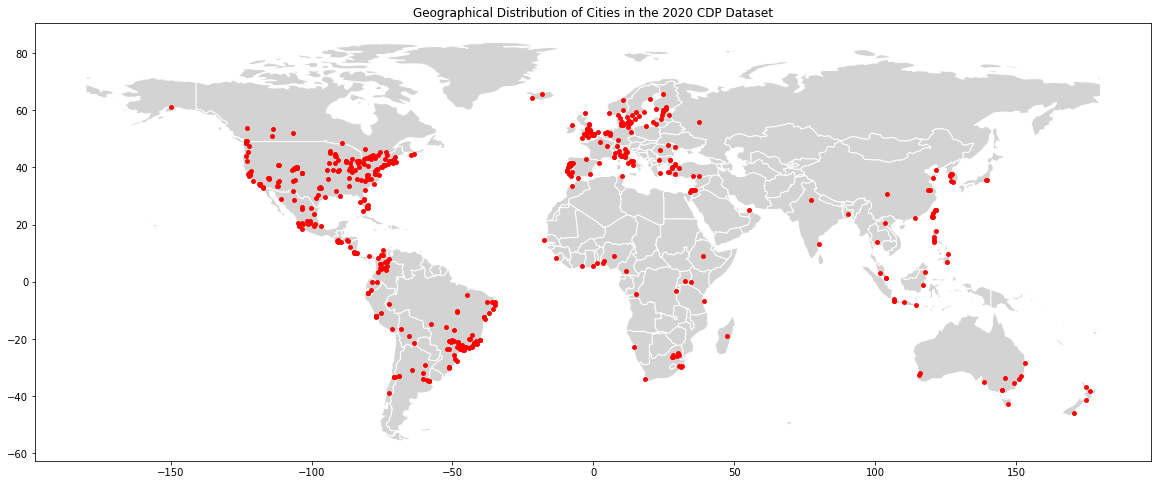

In [5]:
# Read in the cleaned geospatial data provided by Kaggle (shabou) and merge.
# Note: The original geospatial data in "City Location" has many
# missing values and errors.

# Read in the cleaned geospatial dataset from Kaggle
city_coords = pd.read_csv("../input/cdp-challenge-cities-geolocation-data/CDP-Cities-goegraphical-coordinates.csv")

# Change the key column name to facilitate merge
city_coords.rename(columns={"Account.Number":"Account Number"}, inplace=True)

# Merge the geospatial coordinates into the cities dataframe
cities_df = pd.merge(cities_df, city_coords[["Account Number","lat", "long"]])

# Convert to a GeoDataFrame
cities_gdf = gpd.GeoDataFrame(cities_df, geometry=
                             gpd.points_from_xy(cities_df['long'], cities_df['lat']))

# Set the Coordinate Reference System
cities_gdf.crs = "epsg:4326"

# Drop the old city location column
cities_gdf.drop(columns="City Location", inplace=True)

# Import a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove Antarctica from the map
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Plot the city locations on top of the world map
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Geographical Distribution of Cities in the 2020 CDP Dataset")
ax.set_aspect('equal')
world.plot(ax=ax, color='lightgrey', edgecolor='white')
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=15);

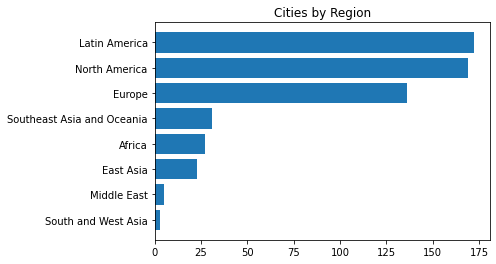

In [6]:
# Visualize the distribution of cities by region

cities_by_region = cities_df["CDP Region"].value_counts(ascending=True)

plt.barh(y = cities_by_region.keys(), width = cities_by_region.values)
plt.title('Cities by Region');

In terms of population size, the dataset includes a wide range from some of the largest cities in the world down to very small communities. Some of these small communities might not conventionally be considered cities.

# 3. Climate Hazards

This section of the notebook examines what the CDP data can tell us about the climate hazards that are currently affecting cities worldwide, with a focus on how these hazards impact vulnerable populations.

## Extraction & Transformation
Cities provided information about the climate hazards they face in their responses to question 2.1 on the 2020 questionnaire: 

> "Please list the most significant climate hazards faced by your city and indicate the probability and consequence of these hazards, as well as the expected future change in frequency and intensity. Please also select the most relevant assets or services that are affected by the climate hazard and provide a description of the impact."

I extracted the most relevant information from the responses to this part of the survey and summarized it in a new dataset with one row for each distinct hazard reported and the following fields of information about those hazards:
* **Hazard Number** (int): Identifying number for each hazard reported by a given city (ex. if a city reported 5 hazards, they are identified as hazards 1 through 5).
* **Hazard Type** (string): Category for the type of hazard reported, selected from a list of standard categories provided by CDP (ex. drought, fire, etc.).
* **Risk to VPs** (1/0): Whether or not the city reported that the hazard is expected to increase the risk to already vulnerable populations.
* **Vulnerable Populations** (1/0): A series of columns indicating which vulnerable populations the city identified as being affected by the hazard, selected from a standard list provided by CDP (ex. women & girls, elderly, etc.).
* **Total VPs Affected** (int): The total number of vulnerable populations identified by the city as being affected by the hazard.

In [7]:
# Create a new dataframe to hold the hazards reported by each city (in 2020)

# Extract the data
hazards_df = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                       (fc_df["Question Number"] == "2.1") &
                       (fc_df["Column Number"] == 1) &
                       (~fc_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

# Rename the columns
hazards_df.rename(columns={"Year Reported to CDP": "Year", "Response Answer": "Hazard"}, inplace=True)

# Add a column to indicate whether the hazards increased risk to already vulnerable populations.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "2.1") &
                 (fc_df["Column Number"] == 5) &
                 (fc_df["Response Answer"] == "Increased risk to already vulnerable populations"),
                 ["Account Number", "Row Number", "Response Answer"]
                ].groupby(["Account Number", "Row Number"])["Response Answer"].count()

# Merge the data into the df
hazards_df = pd.merge(hazards_df, data, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
hazards_df.rename(columns={"Response Answer": "Risk to VPs"}, inplace=True)

# Fill in missing values with 0 and convert the entire column to integers
hazards_df["Risk to VPs"] = hazards_df["Risk to VPs"].fillna(value=0)
hazards_df["Risk to VPs"] = hazards_df["Risk to VPs"].astype(int)

# Add columns for the vulnearble populations impacted by the hazards.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "2.1") &
                 (fc_df["Column Number"] == 7),
                 ["Account Number", "Row Number", "Response Answer"]
                ]

# Simplify all "Other..." responses to "Other"
data.loc[(~data["Response Answer"].isna()) &
               (data["Response Answer"].str.startswith("Other")),
               "Response Answer"] = "Other"

# Dummy the new column
data = pd.get_dummies(data, columns=["Response Answer"], prefix="", prefix_sep="")

# Aggregate the data for each distinct hazard
data = data.groupby(["Account Number", "Row Number"]).sum()

# Add a column for the total number of VPs affected
data["Total VPs Affected"] = data.sum(axis=1)

# Merge the data into the df
hazards_df = pd.merge(hazards_df, data, how="left", on=["Account Number", "Row Number"])

# Clean up the column names
hazards_df.rename(columns={"Row Number": "Hazard Number", "Hazard": "Hazard Type"}, inplace=True)

print(hazards_df.shape)
hazards_df.head()

(2703, 20)


,Account Number,Organization,Country,CDP Region,Year,Hazard Number,Hazard Type,Risk to VPs,Children & youth,Elderly,Indigenous population,Low-income households,Marginalized groups,Other,Persons living in sub-standard housing,Persons with chronic diseases,Persons with disabilities,Unemployed persons,Women & girls,Total VPs Affected
0,1184,City of Austin,United States of America,North America,2020,1,Water Scarcity > Drought,1,0,0,0,1,1,0,1,0,0,0,0,3
1,1184,City of Austin,United States of America,North America,2020,2,Flood and sea level rise > Flash / surface flood,1,0,0,0,1,1,0,1,0,1,1,0,5
2,1184,City of Austin,United States of America,North America,2020,3,Extreme hot temperature > Extreme hot days,1,0,1,0,1,1,0,1,1,1,1,0,7
3,1184,City of Austin,United States of America,North America,2020,4,Wild fire > Forest fire,0,1,1,0,1,1,0,1,1,1,0,0,7
4,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Extreme hot temperature > Heat wave,1,1,1,0,1,0,0,1,1,0,0,1,6


## Exploratory Analysis

### How many climate hazards does each city face on average?
* The 566 cities that responded to the CDP questionnaire reported **a total of 2,703 climate hazards**. Individual cities therefore report facing **an average of between four and five climate hazards**.

### Which types of hazards do cities most commonly face?
* The most commonly reported hazards are **rain storms, droughts, heat waves, and flash floods**. These top hazards are reported much more frequently that other types of hazards.
* The surprisingly low frequency of **monsoons** (at the very bottom of the list) appears to reflect the fact that Asian cities are underreprestented in the CDP data.

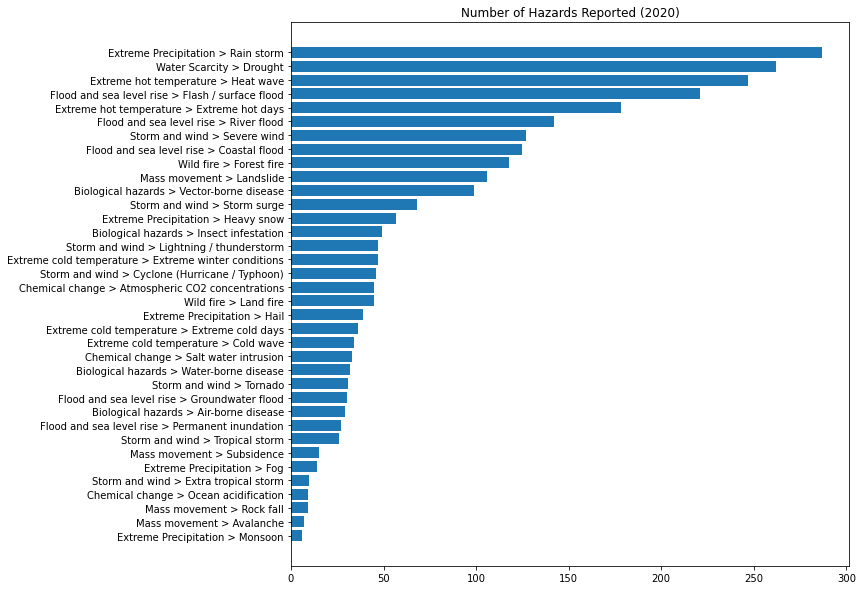

In [8]:
# Which hazards do cities most commonly face?

most_common_hazards = hazards_df.groupby("Hazard Type")["Hazard Number"].count().sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.barh(y = most_common_hazards.keys(), width = most_common_hazards.values)
plt.title('Number of Hazards Reported (2020)');

### What percentage of hazards do cities report are increasing the risk to vulnerable populations?
* Cities reported that **55.5%** of all climate hazards increase the risk to already vulnerable populations (1500 out of 2703).

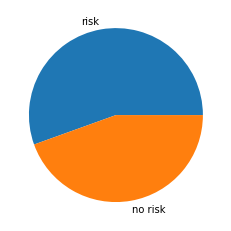

In [9]:
# What percentage of hazards do cities report are increasing the risk to vulnerable populations?

total = hazards_df["Risk to VPs"].count()
risk = hazards_df["Risk to VPs"].sum()
perc = round((risk/total)*100, 1)

plt.pie(x = [risk, total-risk], labels=["risk", "no risk"]);

### Which types of hazards most frequently affect vulnerable populations?

* Cities reported that **cyclones, heat waves, and cold waves** are the hazards that most frequently affect vulnerable populations.
* More generally, the data suggests that almost all types of hazards can and do impact vulnerable populations.

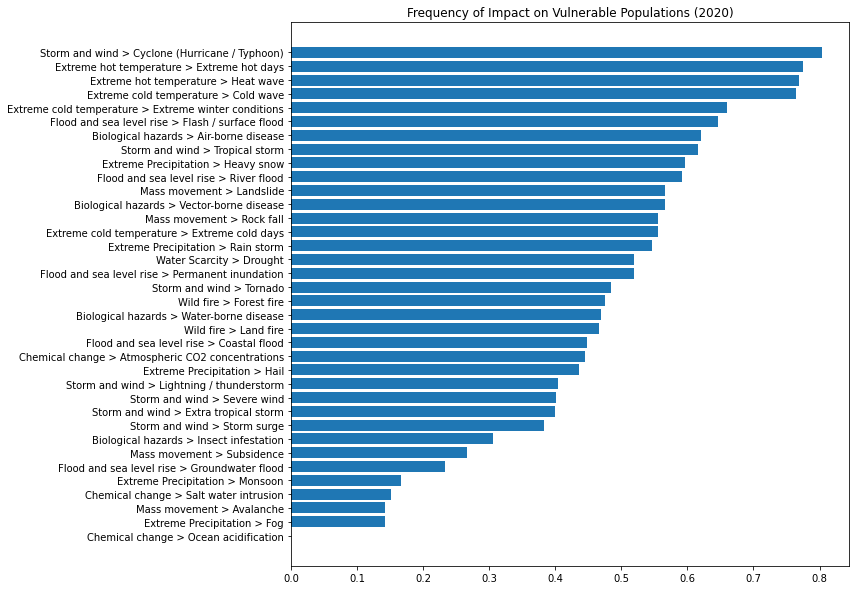

In [10]:
# Which hazards most frequently affect already vulnerable populations?

freq_impact_on_vps = hazards_df.groupby("Hazard Type")["Risk to VPs"].mean().sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.barh(y = freq_impact_on_vps.keys(), width = freq_impact_on_vps.values)
plt.title('Frequency of Impact on Vulnerable Populations (2020)');

### Which types of hazards impact the largest total number of vulnerable populations?
* Cities reported that **heat waves, rain storms, droughts, extreme hot days, and flash floods** impact the most vulnerable populations.

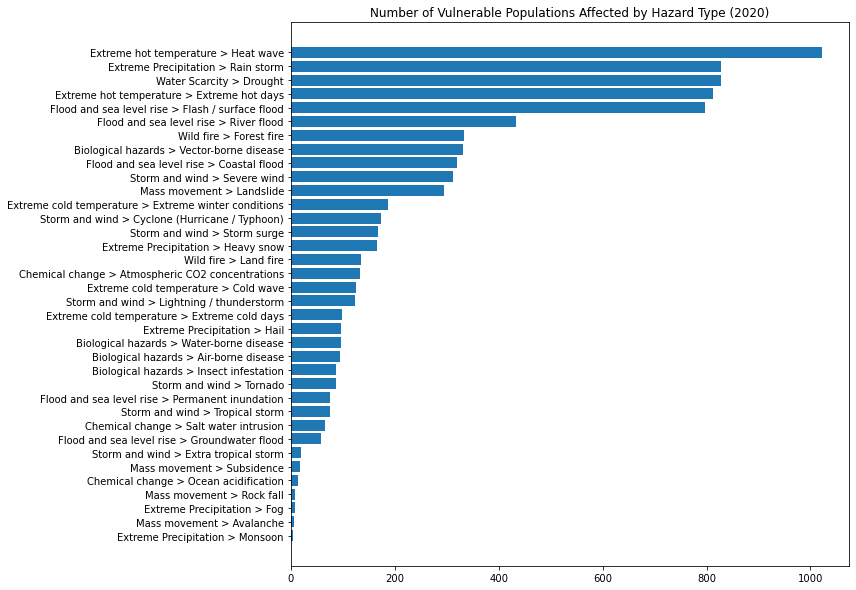

In [11]:
# Which hazards have the greatest total impact on vulnerable populations?

most_impact_on_vps = hazards_df.groupby("Hazard Type")["Total VPs Affected"].sum().sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.barh(y = most_impact_on_vps.keys(), width = most_impact_on_vps.values)
plt.title('Number of Vulnerable Populations Affected by Hazard Type (2020)');

### Which types of hazards impact the highest average number of vulnerable populations per incident?
* Cities report that **extreme hot days, heat waves, extreme winter conditions, and cyclones** impact the highest number of vulnerable populations per incident.

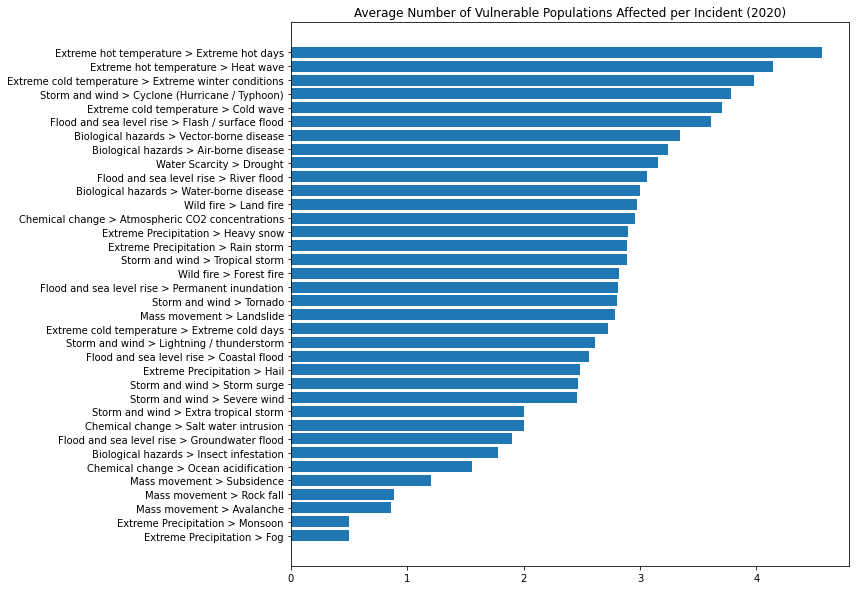

In [12]:
# Which hazards have the greatest average impact on vulnerable populations?

most_impact_on_vps = hazards_df.groupby("Hazard Type")["Total VPs Affected"].mean().sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.barh(y = most_impact_on_vps.keys(), width = most_impact_on_vps.values)
plt.title('Average Number of Vulnerable Populations Affected per Incident (2020)');

### Which vulnerable populations are most frequently affected by climate hazards overall?
* Cities report that **the elderly, low-income households, and persons living in sub-standard housing** are most frequently affected by climate hazards. This makes sense given that the hazards most commonly affecting vulnerable populations are extreme weather conditions like heat waves.

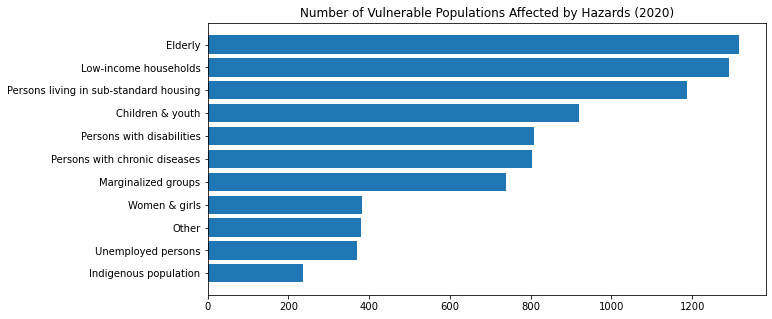

In [13]:
# Which vulnerable populations are most affected by climate hazards overall?

most_affected_vps = hazards_df.iloc[:, 8:19].sum().sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.barh(y = most_affected_vps.keys(), width = most_affected_vps.values)
plt.title('Number of Vulnerable Populations Affected by Hazards (2020)');

### Which vulnerable populations are most frequently affected by specific types of hazards, such as forest fires?
* Cities report that **people with chronic diseases and the elderly** are more frequently affected by forest fires. This makes sense because people with health conditions like asthma are more affected by the smoke from forest fires.

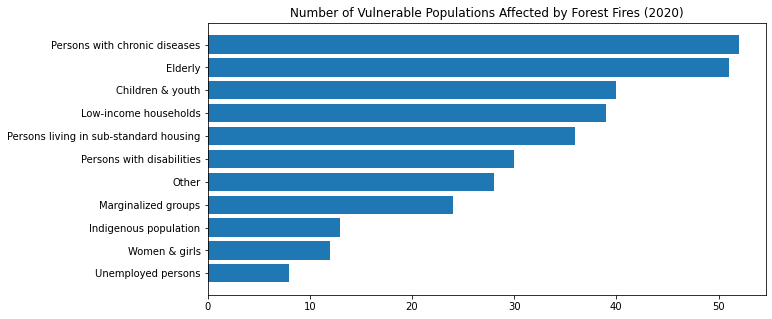

In [14]:
# Which vulnerable populations does each type of hazard affect the most?
# Example 1: Forest fires

forest_fires = hazards_df.loc[hazards_df["Hazard Type"] == "Wild fire > Forest fire"].iloc[:, 8:19].sum().sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.barh(y = forest_fires.keys(), width = forest_fires.values)
plt.title('Number of Vulnerable Populations Affected by Forest Fires (2020)');

### Which vulnerable populations are most frequently affected by cyclones (hurricanes and typhoons)?
* Cities report that **the elderly and low income households** are most frequently affected by cyclones.

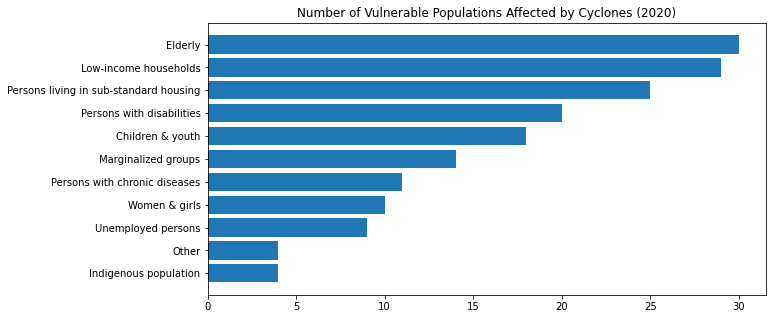

In [15]:
# Which vulnerable populations does each type of hazard affect the most?
# Example 2: Cyclones (hurricanes and typhoons)

cyclones = hazards_df.loc[hazards_df["Hazard Type"] == "Storm and wind > Cyclone (Hurricane / Typhoon)"].iloc[:, 8:19].sum().sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.barh(y = cyclones.keys(), width = cyclones.values)
plt.title('Number of Vulnerable Populations Affected by Cyclones (2020)');

## Summary of Climate Hazards

* The main story in the data reported by cities is that of extreme temperatures (particularly heat waves) affecting the elderly. This seems to be the kind of climate impact on vulnerable populations that cities are most aware of.
* However, there are other stories buried here as well. For example, the impact of forest fires on people with chronic diseases. Cities need to pay more attention to and report these other connections between climate hazards and vulnerable populations.

# 4. Climate Actions

This section of the notebook examines what the CDP data can tell us about the actions that cities are taking in response to climate hazards, with a focus on how these actions aim to protect vulnerable populations.

## Extraction & Transformation

Cities provided information about the actions they are taking to mitigate climate hazards in their responses to question 3.0 on the 2020 questionnaire: 
> “Please describe the main actions you are taking to reduce the risk to, and vulnerability of, your city’s infrastructure, services, citizens, and businesses from climate change as identified in the Climate Hazards section.” 

I extracted the most relevant information from the responses to this part of the survey and summarized it in a new dataset with one row for each distinct action reported and the following fields of information about those actions:
* **Action Number** (int): Identifying number for each action reported by a given city (ex. if a city reported 5 actions, they would be identified as actions 1 through 5, even if two of these actions were in response to one hazard and the other three in response to another hazard).
* **Action Type** (string): Category for the type of action reported, drawn from a given list of possible answers (ex. Flood mapping, community engagement, etc.). Note that one of the possible categories is “Projects and policies targeted at those most vulnerable”.
* **Hazard Type** (string): Category for the type of hazard that the action was a response to. These hazards match exactly the hazards reported in Question 2.1.
* **Poverty Reduction** (1/0): Whether or not the city reported “Poverty reduction/eradication” as a co-benefit area of the action.
* **Social Inclusion** (1/0): Whether or not the city reported “Social inclusion, social justice” as a co-benefit area of the action.


In [16]:
# Create a new dataframe to hold the actions reported by each city (in 2020)

# Extract the data
actions_df = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                       (fc_df["Question Number"] == "3.0") &
                       (fc_df["Column Number"] == 2) &
                       (~fc_df["Response Answer"].isna())&
                       (fc_df["Response Answer"] != "No action currently taken"),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

# Simplify all "Other..." responses to "Other"
actions_df.loc[(~actions_df["Response Answer"].isna()) &
               (actions_df["Response Answer"].str.startswith("Other")),
               "Response Answer"] = "Other"

# Rename the columns
actions_df.rename(columns={"Year Reported to CDP": "Year", "Response Answer": "Action"}, inplace=True)

# Add a column for the hazards targeted by the actions.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "3.0") &
                 (fc_df["Column Number"] == 1),
                 ["Account Number", "Row Number", "Response Answer"]
                ]

# Merge the data into the df
actions_df = pd.merge(actions_df, data, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
actions_df.rename(columns={"Response Answer": "Hazard"}, inplace=True)

# Add a column to indicate whether the action benefits poverty reduction.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "3.0") &
                 (fc_df["Column Number"] == 6) &
                 (fc_df["Response Answer"] == "Poverty reduction / eradication"),
                 ["Account Number", "Row Number", "Response Answer"]
                ].groupby(["Account Number", "Row Number"])["Response Answer"].count()

# Merge the data into the df
actions_df = pd.merge(actions_df, data, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
actions_df.rename(columns={"Response Answer": "Poverty Reduction"}, inplace=True)

# Clean up the values in the new column
actions_df["Poverty Reduction"] = actions_df["Poverty Reduction"].fillna(value=0)
actions_df["Poverty Reduction"] = actions_df["Poverty Reduction"].astype(int)

# Add a column to indicate whether the action benefits social inclusion.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "3.0") &
                 (fc_df["Column Number"] == 6) &
                 (fc_df["Response Answer"] == "Social inclusion, social justice"),
                 ["Account Number", "Row Number", "Response Answer"]
                ].groupby(["Account Number", "Row Number"])["Response Answer"].count()

# Merge the data into the df
actions_df = pd.merge(actions_df, data, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
actions_df.rename(columns={"Response Answer": "Social Inclusion"}, inplace=True)

actions_df["Social Inclusion"] = actions_df["Social Inclusion"].fillna(value=0)
actions_df["Social Inclusion"] = actions_df["Social Inclusion"].astype(int)

# Clean up the column names

actions_df.rename(columns={"Row Number": "Action Number", "Action": "Action Type", "Hazard": "Hazard Type"}, inplace=True)

print(actions_df.shape)
actions_df.head()

(2629, 10)


,Account Number,Organization,Country,CDP Region,Year,Action Number,Action Type,Hazard Type,Poverty Reduction,Social Inclusion
0,1184,City of Austin,United States of America,North America,2020,1,Flood mapping,Flood and sea level rise > Flash / surface flood,0,1
1,1184,City of Austin,United States of America,North America,2020,2,Community engagement/education,Wild fire > Forest fire,0,0
2,1184,City of Austin,United States of America,North America,2020,3,Heat mapping and thermal imaging,Extreme hot temperature > Extreme hot days,1,1
3,1184,City of Austin,United States of America,North America,2020,4,Diversification of water supply,Water Scarcity > Drought,0,0
4,1184,City of Austin,United States of America,North America,2020,5,Community engagement/education,Flood and sea level rise > Flash / surface flood,1,1


## Exploratory Analysis

### How many actions, on average, are cities taking in response to climate hazards? <br>
* The 566 cities that responded to the CDP questionnaire reported a total of 2,629 climate actions. Individual cities therefore take an average of **four to five distinct actions, or about one action per hazard**.

### What are the most common types of actions reported by cities?
* Cities reported that **flood mapping, tree planting, and community education**, were the most common types of actions taken to mitigate climate hazards.
* Note that the largest number of actions reported were categorized as **'Other'**. This may suggest that cities are developing innovative actions that do not fit into conventional categories.

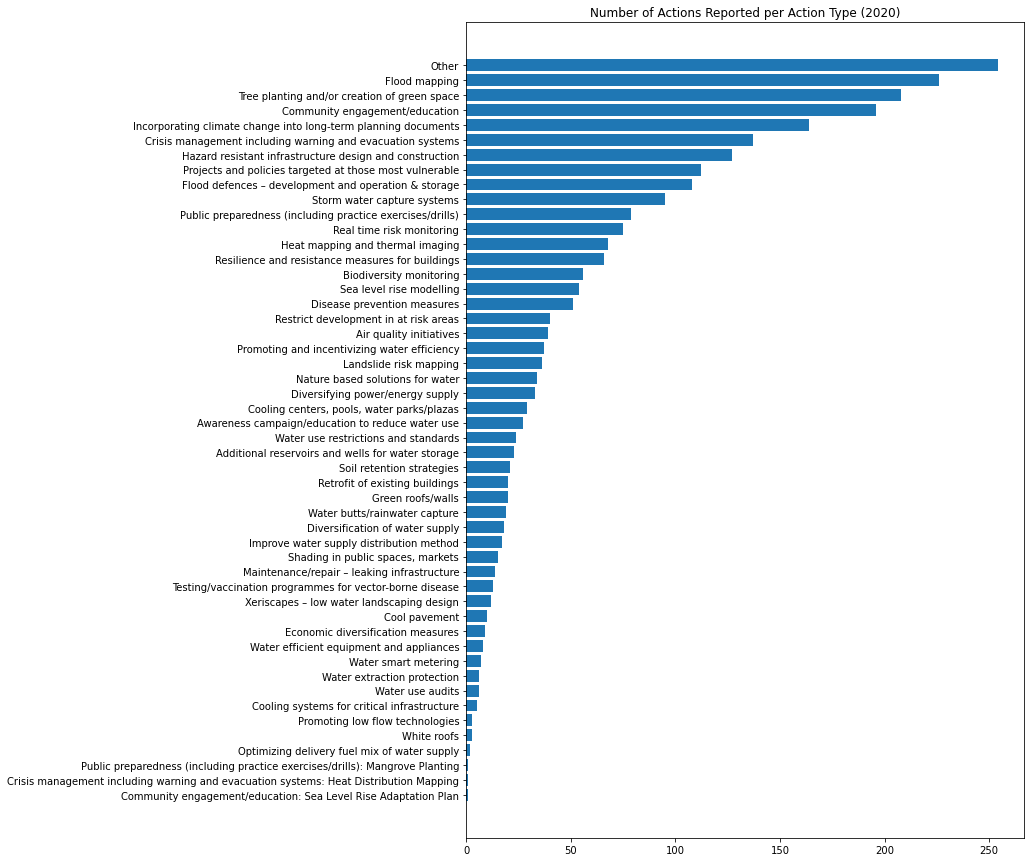

In [17]:
# What are the most common types of actions that cities take to mitigate climate hazards?

most_common_actions = actions_df.groupby("Action Type")["Action Number"].count().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = most_common_actions.keys(), width = most_common_actions.values)
plt.title('Number of Actions Reported per Action Type (2020)');

### Which types of hazards did cities respond to with the most actions?
* Cities reported that **rain storms, heat waves, flash floods, droughts, and extreme hot days** are the hazards that cities are responding to the most.
* This parallels the most common hazards faced by cities (see above).

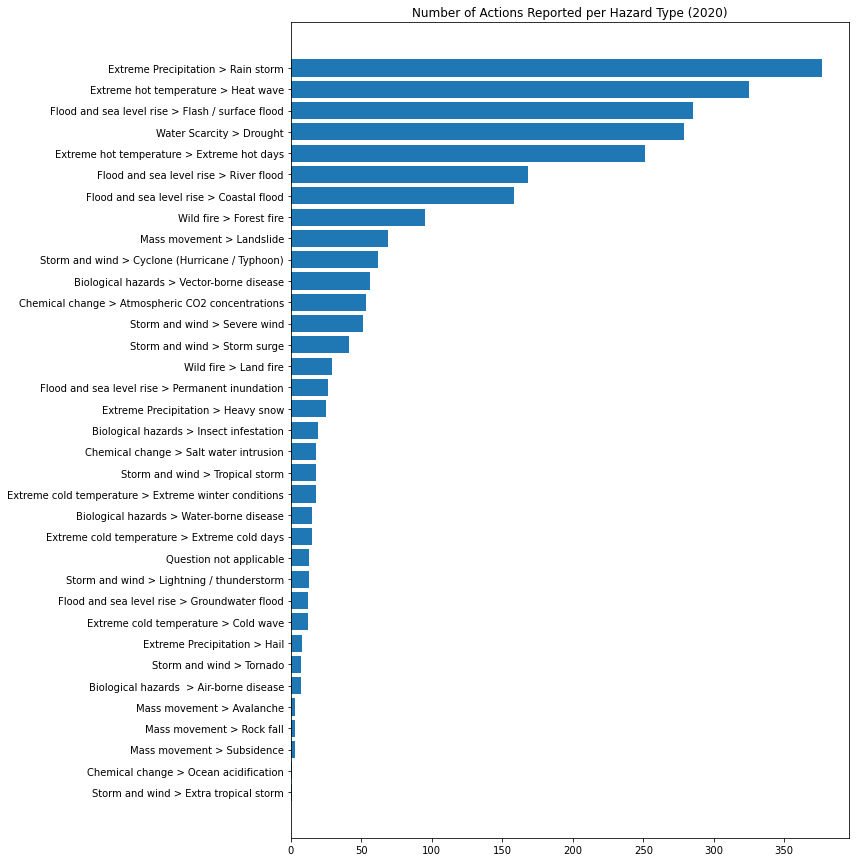

In [18]:
# Which types of hazards had the most actions in response to them?

most_targetted_hazards = actions_df.groupby("Hazard Type")["Action Number"].count().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = most_targetted_hazards.keys(), width = most_targetted_hazards.values)
plt.title('Number of Actions Reported per Hazard Type (2020)');

### What percentage of hazard responses include actions aimed at protecting vulnerable populations?
* According to their own reports, cities are taking actions aimed at vulnerable populations in response to **only 4%** of the hazards they are experiencing (112 out of 2,536). 
* This is far below the 55% of hazards that cities report as affecting vulnerable populations (see above).

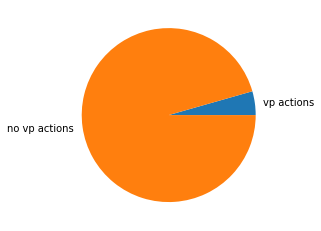

In [19]:
# What percentage of hazard responses include actions targeting the most vulnerable?


vp_actions = actions_df.loc[actions_df["Action Type"] == "Projects and policies targeted at those most vulnerable",
               "Action Type"
              ].count()
hazard_responses = actions_df.groupby("Account Number")["Hazard Type"].count().sum()
percentage = round((vp_actions/hazard_responses)*100)

plt.pie(x = [vp_actions, hazard_responses-vp_actions], labels=["vp actions", "no vp actions"]);

### Which types of hazards had the most actions aimed at protecting vulnerable populations?
* Cities report that **heat waves, extreme hot days, rain storms, and flash floods** have the most actions targeting vulnerable populations.
* Although the hazards that cities are responding to with actions aimed at vulnerable populations are mostly those hazards that they report to have the greatest impact on vulnerable populations (see above), there are some significant discrepancies. **Cyclones**, for example, are the type of hazard that cities report most frequently affect vulnerable populations, yet they do not often respond to cyclones with actions that aim to protect vulnerable populations.

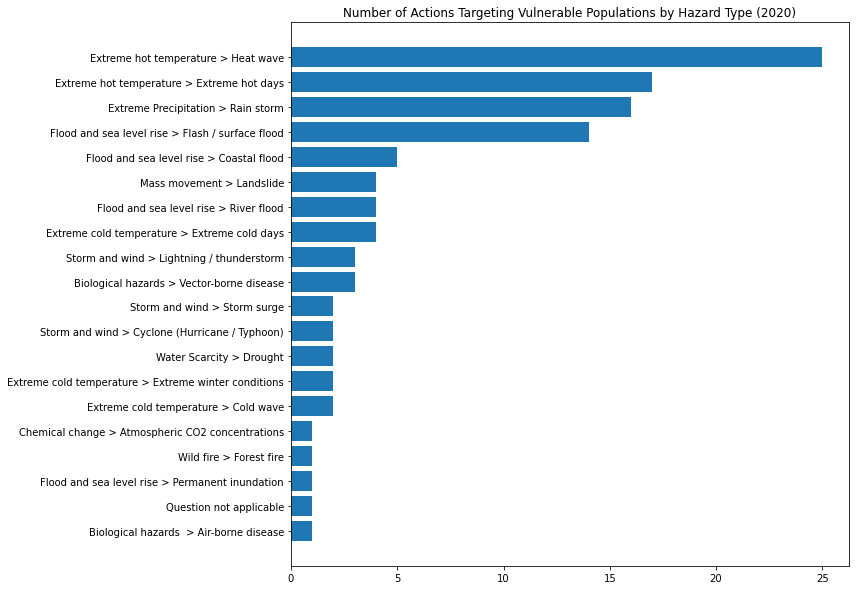

In [20]:
# Which types of hazards had the most projects targeting vulnerable populations?

vp_hazards = actions_df.loc[actions_df["Action Type"] == "Projects and policies targeted at those most vulnerable"
              ].groupby(["Hazard Type"])["Action Type"].count().sort_values(ascending=True)

plt.figure(figsize=(10,10))
plt.barh(y = vp_hazards.keys(), width = vp_hazards.values)
plt.title('Number of Actions Targeting Vulnerable Populations by Hazard Type (2020)');

### Which types of actions are beneficial for poverty reduction?
* Cities report that **projects targetting vulnerable populations** benefit poverty reduction far more than any other type of action.

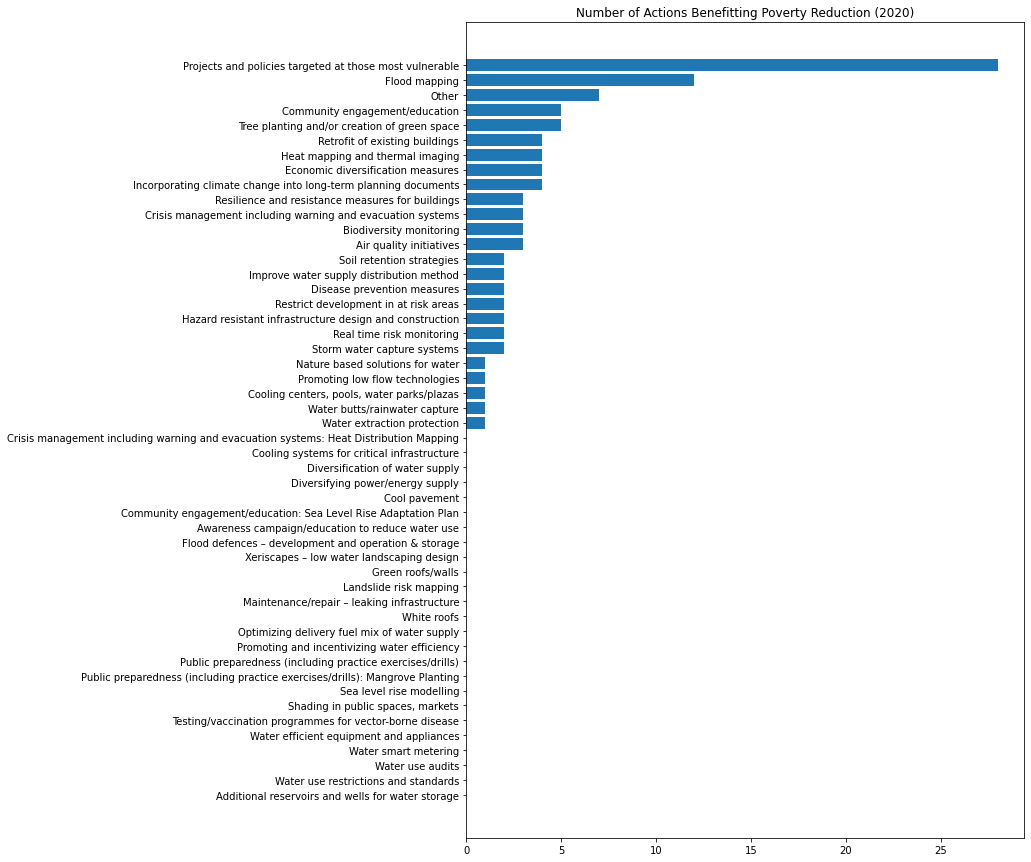

In [21]:
# Which actions have most benefited povery reduction?

pov_red = actions_df.groupby("Action Type")["Poverty Reduction"].sum().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = pov_red.keys(), width = pov_red.values)
plt.title('Number of Actions Benefitting Poverty Reduction (2020)');

### Which types of actions most frequently benefit poverty reduction?
* Cities report that **economic diversification measures and promotion of low flow technologies** are types of actions that most frequently have a beneficial impact on poverty reduction.

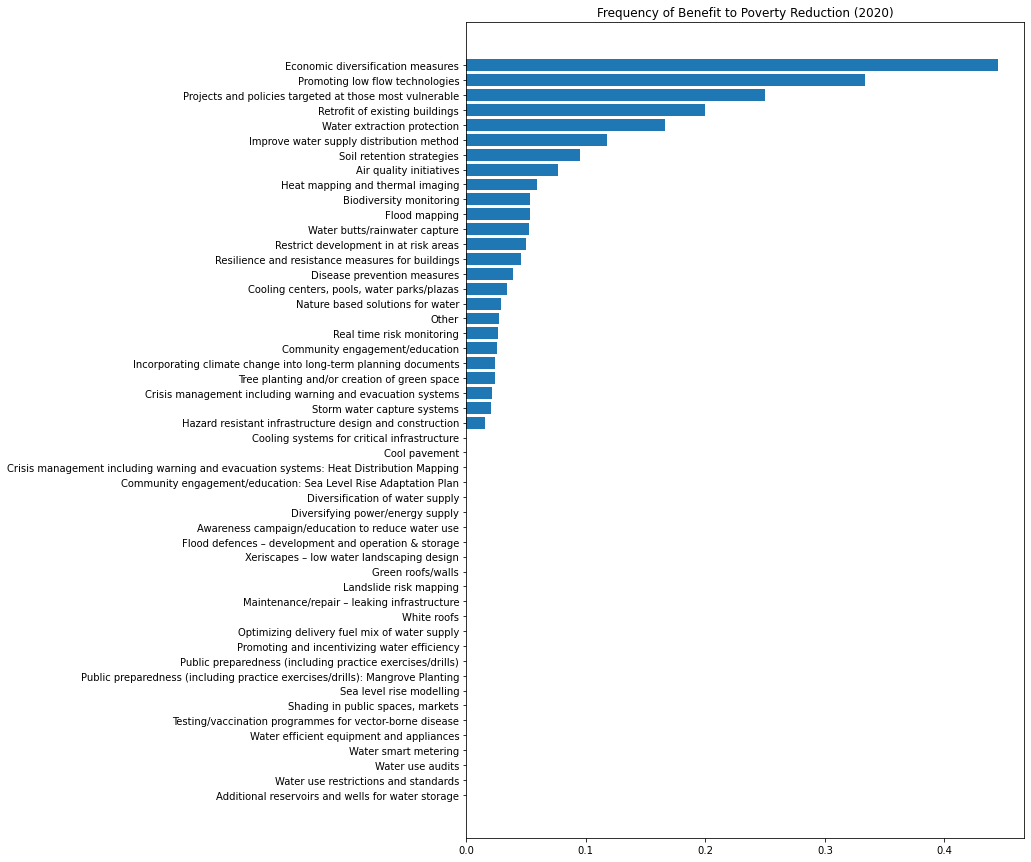

In [22]:
# Which actions most frequently benefit poverty reduction?

freq_pov_red = actions_df.groupby("Action Type")["Poverty Reduction"].mean().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = freq_pov_red.keys(), width = freq_pov_red.values)
plt.title('Frequency of Benefit to Poverty Reduction (2020)');

### Which types of actions are beneficial to social inclusion?
* Cities report that **projects targetting vulnerable populations** are by far the most beneficial for social inclusion, followed by **community engagement and education**.
* This suggests that community engagement on climate hazards is an important way for cities to overcome the social marginalization of vulnerable populations.

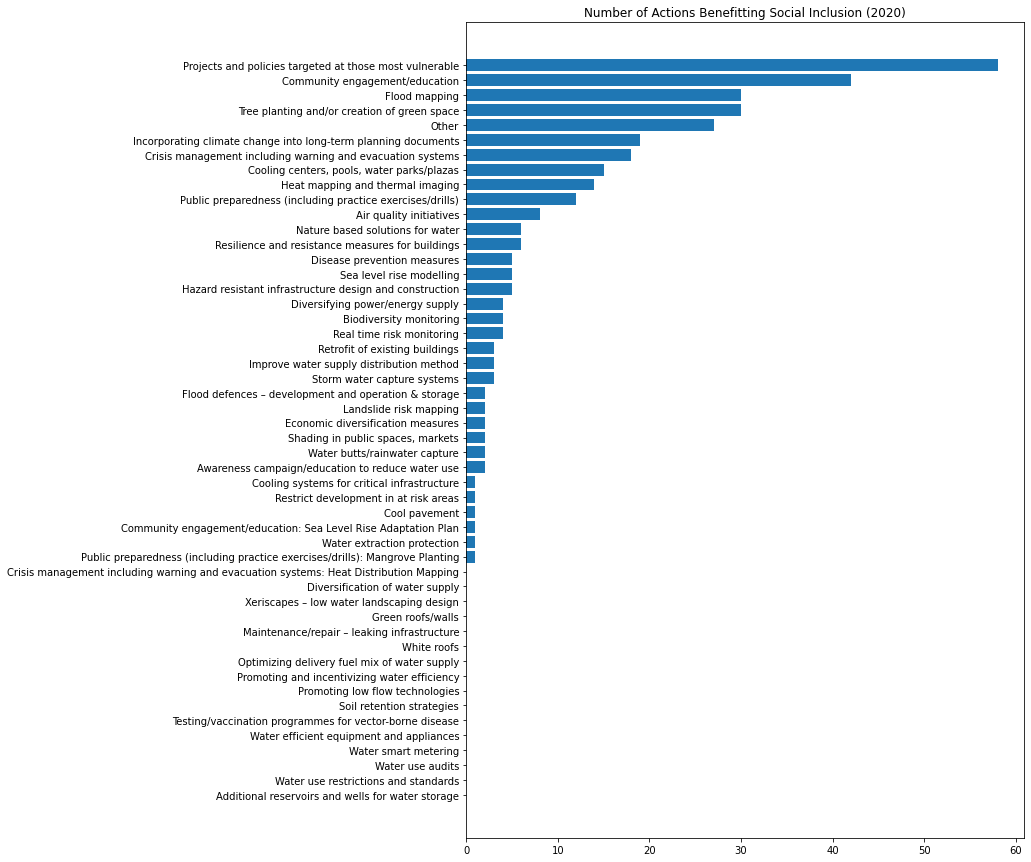

In [23]:
# Which actions have benefits for social inclusion?

soc_inc = actions_df.groupby("Action Type")["Social Inclusion"].sum().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = soc_inc.keys(), width = soc_inc.values)
plt.title('Number of Actions Benefitting Social Inclusion (2020)');

### Which types of actions most frequently benefit social inclusion?
* Cities report that **mangrove planting, sea level rise adaptation planning, and promotion of low flow technologies** most frequently benefit social inclusion.
* However, it is unclear whether the data on mangrove planting and sea level adapation is actually statistically significant because in each case only one action was reported.

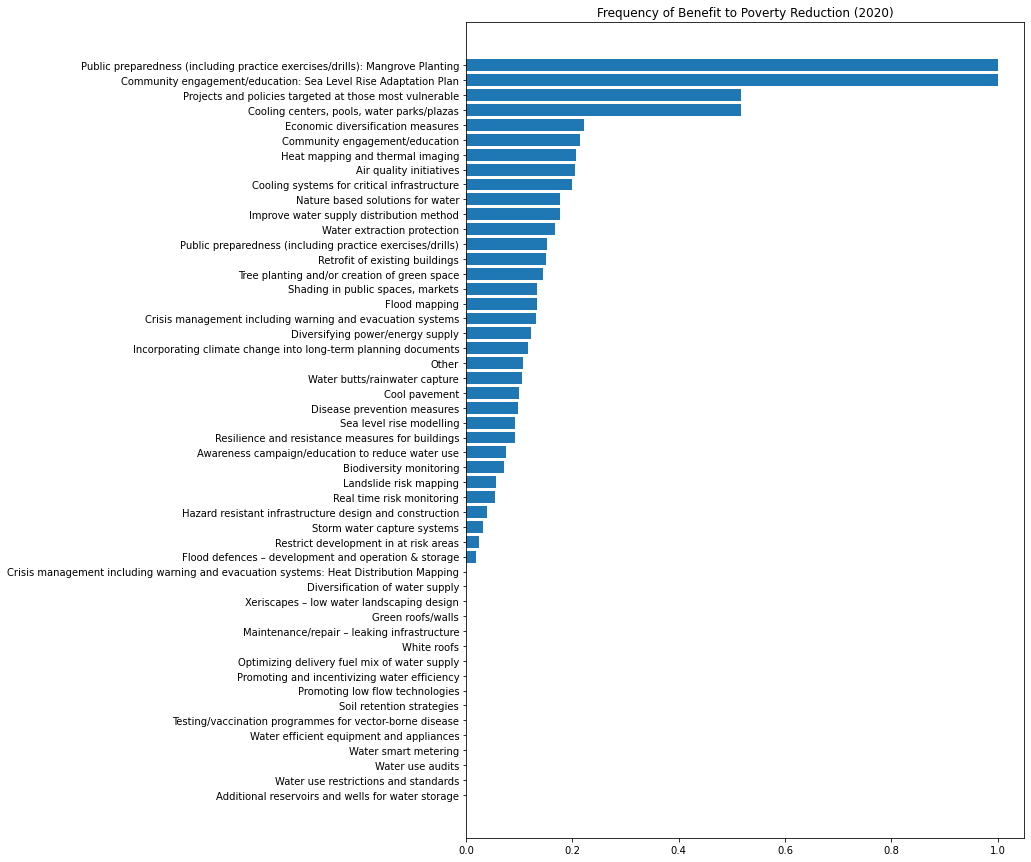

In [24]:
# Which actions most frequently benefit social inclusion?

freq_soc_inc = actions_df.groupby("Action Type")["Social Inclusion"].mean().sort_values(ascending=True)

plt.figure(figsize=(10,15))
plt.barh(y = freq_soc_inc.keys(), width = freq_soc_inc.values)
plt.title('Frequency of Benefit to Poverty Reduction (2020)');

## Summary of Climate Actions

* The main story here is that, according to their own reporting, cities are not focusing their climate actions on mitigation of the impact on already vulnerable populations (even when they are aware that climate hazards are increasing the risk to such populations).
* A corollary is that, even when cities are taking actions aimed at vulnerable populations, they are not always in response to the hazards that most frequently affect vulnerable populations, such as cyclones and cold waves (#4 and 5). Certain types of hazards are most likely to affect vulnerable populations, and thus should include actions to mitigate that impact.
* There are also some secondary insights that certain types of projects have been reported as potentially more beneficial for vulnerable populations: economic diversification, low flow technologies, retrofit existing buildings, (for poverty reduction), and community engagement/education (for social inclusion).

# 5. Climate Equity

This section of the notebook combines the foregoing data on climate hazards and actions into Key Performance Indicators (KPIs) and a composite score for each individual city, then analyzes these scores and compares them with CDP city scores to extract insights about the current state of urban climate equity.

## KPI Modeling

Key Performance Indicators (KPIs) were selected from the foregoing data on climate hazards and actions, then combined into a composite Climate Equity Score for each city. The five KPIs selected were first combined into two intermediary categories: Awareness and Action. The KPIs in the awareness category measure how well a city identifies and evaluates the impact of climate hazards on vulnerable populations. The KPIs in the action category measure how well a city’s response to climate hazards addresses the impact on vulnerable populations. When combined together, the awareness and action KPIs provide a relatively comprehensive measurement of how well a city incorporates social equity into its climate adaption efforts (i.e. the climate equity score).

*Awareness KPIs*:
* **Evaluation of Risk to VPs** (1/0): Whether or not the city has at least one climate risk and vulnerability assessment that identifies vulnerable populations. Note that some cities have multiple assessments – only one of these needs to identify vulnerable populations.
* **Affected VPs per Hazard** (Normalized) (float): Average number of vulnerable populations the city identifies per climate hazard, normalized on a scale of (0,1) relative to other cities in the sample.

*Action KPIs*:
* **VP Actions per Hazard (Normalized)** (float): Average number of actions targeting vulnerable populations the city took per climate hazard, normalized on a scale of (0,1) relative to other cities in the sample.
* **PR Actions Per Hazard (Normalized)** (float): Average number of actions beneficial to poverty reduction per climate hazard, normalized on a scale of (0,1) relative to other cities in the sample.
* **SI Actions Per Hazard (Normalized)** (float): Average number of actions beneficial to social inclusion per climate hazard, normalized on a scale of (0,1) relative to other cities in the sample.

In [25]:
# Create a new dataframe to hold the KPI values for each distinct city (in the 2020 survey)

# Make the new dataframe with just one row per city
equity_df = pd.DataFrame(fc_df.drop_duplicates(subset=["Account Number"], keep='last', ignore_index=True))

# Drop the columns for survey answers
equity_df.drop(equity_df.columns.difference(["Account Number", "Organization", "Country", "CDP Region"]), 
               1, inplace=True)

# Sort the dataframe from account number in ascending order
equity_df.sort_values(by=["Account Number"], ignore_index=True, inplace=True)

# Add a column to indicate whether the city has undertaken *at least one*
# climate change risk assessment that identifies vulnerable populations.

# Extract the data from the survey
data = fc_df.loc[(fc_df["Year Reported to CDP"] == 2020) &
                 (fc_df["Question Number"] == "2.0b") &
                 (fc_df["Column Number"] == 7) &
                 (fc_df["Response Answer"] == "Yes"),
                 ["Account Number", "Response Answer"]
                ].groupby(["Account Number"])["Response Answer"].count()

# Merge the data into the df
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Give the column a more descriptive name
equity_df.rename(columns={"Response Answer": "Evaluation of Risk to VPs"}, inplace=True)

# Clean up the column to 0s and 1s as integers
equity_df["Evaluation of Risk to VPs"] = equity_df["Evaluation of Risk to VPs"].fillna(value=0)
equity_df["Evaluation of Risk to VPs"] = equity_df["Evaluation of Risk to VPs"].astype(int)
equity_df.loc[equity_df["Evaluation of Risk to VPs"] >= 1, "Evaluation of Risk to VPs"] = 1

# Add a column for the total number of hazards reported by each city (in 2020)

# Extract the data
data = hazards_df.groupby("Account Number")["Hazard Number"].count()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Give the column a more descriptive name
equity_df.rename(columns={"Hazard Number":"Total Hazards"}, inplace=True)

# Clean up the missing values and datatype
equity_df["Total Hazards"] = equity_df["Total Hazards"].fillna(value=0)
equity_df["Total Hazards"] = equity_df["Total Hazards"].astype(int)

# Add a column for the number of hazards identified as increasing the risk to vulnerable populations

# Extract the data
data = hazards_df.groupby("Account Number")["Risk to VPs"].sum()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Give the column a more descriptive name
equity_df.rename(columns={"Risk to VPs":"Hazards Affecting VPs"}, inplace=True)

# Clean up the missing values and datatype
equity_df["Hazards Affecting VPs"] = equity_df["Hazards Affecting VPs"].fillna(value=0)
equity_df["Hazards Affecting VPs"] = equity_df["Hazards Affecting VPs"].astype(int)

# Add a column for the total number of vulnerable populations identified as affected by the hazards

# Extract the data
data = hazards_df.groupby("Account Number")["Total VPs Affected"].sum()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Clean up the missing values and datatype
equity_df["Total VPs Affected"] = equity_df["Total VPs Affected"].fillna(value=0)
equity_df["Total VPs Affected"] = equity_df["Total VPs Affected"].astype(int)

# Add a column for the average number of vulnerable populations identified per hazard

equity_df["Affected VPs per Hazard"] = round(equity_df["Total VPs Affected"] / equity_df["Total Hazards"], 1)

# Clean up rows where no hazards were reported
equity_df["Affected VPs per Hazard"] = equity_df["Affected VPs per Hazard"].fillna(value=0)

# Add a column for the NORMALIZED average number of vulnerable populations identified per hazard

equity_df["Affected VPs per Hazard (Normalized)"] = (equity_df["Affected VPs per Hazard"] - equity_df["Affected VPs per Hazard"].min()) / (equity_df["Affected VPs per Hazard"].max() - equity_df["Affected VPs per Hazard"].min())

# Add a column for overall awareness of the impact on vulnerable populations
equity_df["Awareness Score"] = (0.5 * equity_df["Evaluation of Risk to VPs"]) + (0.5 * equity_df["Affected VPs per Hazard (Normalized)"])

# Add a column for the total number of actions targeting vulnerable populations

# Extract the data
data = actions_df.loc[actions_df["Action Type"] == "Projects and policies targeted at those most vulnerable",
                      ["Account Number", "Action Type"]
                     ].groupby("Account Number")["Action Type"].count()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Clean up the missing values and datatype
equity_df["Action Type"] = equity_df["Action Type"].fillna(value=0)
equity_df["Action Type"] = equity_df["Action Type"].astype(int)

# Give the column a more descriptive name
equity_df.rename(columns={"Action Type": "Actions Targeting VPs"}, inplace=True)

# Add a column for the average number of actions targeting vulnerable populations per hazard
equity_df["VP Actions per Hazard"] = round(equity_df["Actions Targeting VPs"] / equity_df["Total Hazards"], 1)

# Clean up rows where no hazards were reported
equity_df["VP Actions per Hazard"] = equity_df["VP Actions per Hazard"].fillna(value=0)

# Identify the rows with "inf" value and drop them from the dataframe
index_to_drop = equity_df.loc[equity_df["VP Actions per Hazard"] == equity_df["VP Actions per Hazard"].max()].index
equity_df.drop(axis=0, index=index_to_drop, inplace=True)

# Add a column for the NORMALIZED average number of actions targeting vulnerable populations per hazard
equity_df["VP Actions per Hazard (Normalized)"] = (equity_df["VP Actions per Hazard"] - equity_df["VP Actions per Hazard"].min()) / (equity_df["VP Actions per Hazard"].max() - equity_df["VP Actions per Hazard"].min())

# Add a column for the total number of actions with benefits for poverty reduction

# Extract the data
data = actions_df.groupby("Account Number")["Poverty Reduction"].sum()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Clean up the missing values and datatype
equity_df["Poverty Reduction"] = equity_df["Poverty Reduction"].fillna(value=0)
equity_df["Poverty Reduction"] = equity_df["Poverty Reduction"].astype(int)

# Give the column a more descriptive name
equity_df.rename(columns={"Poverty Reduction": "Actions Benefitting Poverty Reduction"}, inplace=True)

# Add a column for the average number of actions benefitting poverty reduction per hazard

equity_df["PR Actions per Hazard"] = round(equity_df["Actions Benefitting Poverty Reduction"] / equity_df["Total Hazards"], 1)

# Clean up rows where no hazards were reported
equity_df["PR Actions per Hazard"] = equity_df["PR Actions per Hazard"].fillna(value=0)

# Add a column for the NORMALIZED average
equity_df["PR Actions per Hazard (Normalized)"] = (equity_df["PR Actions per Hazard"] - equity_df["PR Actions per Hazard"].min()) / (equity_df["PR Actions per Hazard"].max() - equity_df["PR Actions per Hazard"].min())

# Add a column for the total number of actions with benefits for social inclusion

# Extract the data
data = actions_df.groupby("Account Number")["Social Inclusion"].sum()

# Merge the data
equity_df = pd.merge(equity_df, data, how="left", on=["Account Number"])

# Clean up the missing values and datatype
equity_df["Social Inclusion"] = equity_df["Social Inclusion"].fillna(value=0)
equity_df["Social Inclusion"] = equity_df["Social Inclusion"].astype(int)

# Give the column a more descriptive name
equity_df.rename(columns={"Social Inclusion": "Actions Benefitting Social Inclusion"}, inplace=True)

# Add a column for the average number of actions benefitting social inclusion per hazard
equity_df["SI Actions per Hazard"] = round(equity_df["Actions Benefitting Social Inclusion"] / equity_df["Total Hazards"], 1)

# Clean up rows where no hazards were reported
equity_df["SI Actions per Hazard"] = equity_df["SI Actions per Hazard"].fillna(value=0)

# Add a column for the NORMALIZED average
equity_df["SI Actions per Hazard (Normalized)"] = (equity_df["SI Actions per Hazard"] - equity_df["SI Actions per Hazard"].min()) / (equity_df["SI Actions per Hazard"].max() - equity_df["SI Actions per Hazard"].min())

# Add a column for overall action to mitigate of the impact on VPs
equity_df["Action Score"] = (0.5 * equity_df["VP Actions per Hazard (Normalized)"]) + (0.25 * equity_df["PR Actions per Hazard (Normalized)"]) + (0.25 * equity_df["SI Actions per Hazard (Normalized)"])

# Add a column for overall social equity in climate response
equity_df["Overall Climate Equity Score"] = (0.5 * equity_df["Awareness Score"]) + (0.5 * equity_df["Action Score"])

# Add a column for the ranking of the overall score
ranks = equity_df["Overall Climate Equity Score"].rank(ascending=False, method="min").astype(int)
equity_df["Overall Climate Equity Rank"] = ranks

# Create a reduced version of the dataframe focusing on the KPIs and scores
kpi_df = equity_df[["Account Number",
                    "Organization",
                    "Country",
                    "CDP Region",
                    "Total Hazards",
                    "Evaluation of Risk to VPs",
                    "Affected VPs per Hazard (Normalized)",
                    "Awareness Score",
                    "VP Actions per Hazard (Normalized)",
                    "PR Actions per Hazard (Normalized)",
                    "SI Actions per Hazard (Normalized)",
                    "Action Score",
                    "Overall Climate Equity Score",
                    "Overall Climate Equity Rank"
                   ]
                  ]

print(kpi_df.shape)
kpi_df.head()

(565, 14)


,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank
0,1184,City of Austin,United States of America,North America,4,0,0.518868,0.259434,0.000000,0.333333,0.285714,0.154762,0.207098,312
1,1499,Ajuntament de Barcelona,Spain,Europe,13,1,0.094340,0.547170,0.071429,0.000000,0.035714,0.044643,0.295906,244
2,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,4,0,0.660377,0.330189,0.000000,0.133333,0.178571,0.077976,0.204082,313
3,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,5,1,0.735849,0.867925,0.000000,0.000000,0.071429,0.017857,0.442891,34
4,3203,City of Chicago,United States of America,North America,6,1,0.424528,0.712264,0.000000,0.333333,0.250000,0.145833,0.429049,40


## Exploratory Analysis

### Which cities have the highest overall climate equity scores?
* The highest scoring cities are: **Buenos Aires, Tagum City, Leon de los Aldamas, Montecario,** etc. 
* The top 10 is dominated by cities in **Latin America**, and the United States is not well represented.

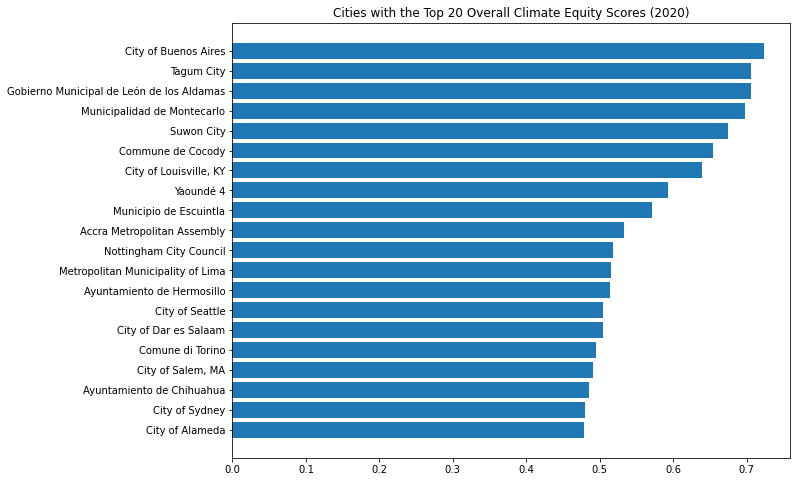

In [26]:
# Which cities have the highest overall climate equity scores?

highest_overall_scores = kpi_df.sort_values(by="Overall Climate Equity Score", ascending=False).head(20)
highest_overall_scores = highest_overall_scores.sort_values(by="Overall Climate Equity Score", ascending=True)

plt.figure(figsize=(10,8))
plt.barh(y = highest_overall_scores["Organization"], width = highest_overall_scores["Overall Climate Equity Score"])
plt.title('Cities with the Top 20 Overall Climate Equity Scores (2020)');

In [27]:
# Which cities have the highest overall climate equity scores?

kpi_df.sort_values(by="Overall Climate Equity Score", ascending=False).head(20)

,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank
38,31155,City of Buenos Aires,Argentina,Latin America,7,1,0.415094,0.707547,1.000000,0.600000,0.357143,0.739286,0.723416,1
516,834374,Tagum City,Philippines,Southeast Asia and Oceania,5,1,0.924528,0.962264,0.000000,0.800000,1.000000,0.450000,0.706132,2
167,50359,Gobierno Municipal de León de los Aldamas,Mexico,Latin America,3,1,0.443396,0.721698,0.714286,0.866667,0.464286,0.689881,0.705790,3
543,841269,Municipalidad de Montecarlo,Argentina,Latin America,3,1,0.405660,0.702830,0.928571,0.200000,0.714286,0.692857,0.697844,4
143,44185,Suwon City,Republic of Korea,East Asia,1,1,0.471698,0.735849,0.714286,0.666667,0.357143,0.613095,0.674472,5
437,73413,Commune de Cocody,Côte d'Ivoire,Africa,2,1,0.849057,0.924528,0.000000,1.000000,0.535714,0.383929,0.654228,6
152,49333,"City of Louisville, KY",United States of America,North America,9,1,0.462264,0.731132,0.642857,0.400000,0.500000,0.546429,0.638780,7
498,831618,Yaoundé 4,Cameroon,Africa,5,1,0.792453,0.896226,0.000000,0.800000,0.357143,0.289286,0.592756,8
520,839666,Municipio de Escuintla,Guatemala,Latin America,2,1,0.518868,0.759434,0.000000,1.000000,0.535714,0.383929,0.571681,9
100,36039,Accra Metropolitan Assembly,Ghana,Africa,2,1,0.518868,0.759434,0.357143,0.333333,0.178571,0.306548,0.532991,10


### Which cities have the lowest overall climate equity scores?
* These are cities that did not report any impact on or actions targeting vulnerable populations. As a result, their scores are zero across the board.

In [28]:
# Which cities have the lowest overall climate equity scores?

kpi_df.sort_values(by="Overall Climate Equity Score", ascending=True).head()

,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank
282,54641,Prefeitura de Limeira,Brazil,Latin America,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501
315,58488,Sonderborg Kommune,Denmark,Europe,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501
320,58591,"City of Greenbelt, MD",United States of America,North America,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501
322,58609,City of Ærøskøbing,Denmark,Europe,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501
328,58796,Odder Kommune,Denmark,Europe,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501


### Which cities have the highest awareness scores?
* **Nottingham, Salem, Chihuahua, and Tagum** have the highest awareness scores.
* There are many cities with high awareness scores.
* Some cities achieved high scores by reporting only a few hazards but many affects on vulnerable populations (ex. Chihuahua).

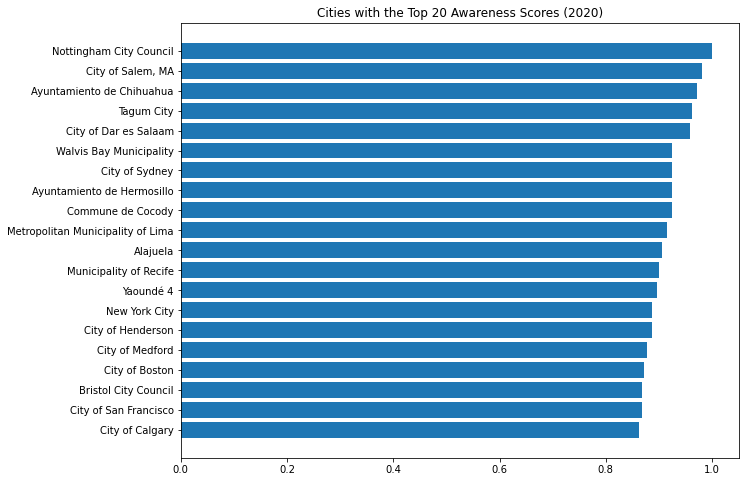

In [29]:
# Which cities have the highest awareness scores?

highest_awareness_scores = kpi_df.sort_values(by="Awareness Score", ascending=False).head(20)
highest_awareness_scores = highest_awareness_scores.sort_values(by="Awareness Score", ascending=True)

plt.figure(figsize=(10,8))
plt.barh(y = highest_awareness_scores["Organization"], width = highest_awareness_scores["Awareness Score"])
plt.title('Cities with the Top 20 Awareness Scores (2020)');

In [30]:
# Which cities have the highest awareness scores?

equity_df.iloc[:, 0:11].sort_values(by="Awareness Score", ascending=False).head(10)

,Account Number,Organization,Country,CDP Region,Evaluation of Risk to VPs,Total Hazards,Hazards Affecting VPs,Total VPs Affected,Affected VPs per Hazard,Affected VPs per Hazard (Normalized),Awareness Score
14,13506,Nottingham City Council,United Kingdom of Great Britain and Northern I...,Europe,1,5,2,53,10.6,1.000000,1.000000
331,58871,"City of Salem, MA",United States of America,North America,1,4,3,41,10.2,0.962264,0.981132
170,50375,Ayuntamiento de Chihuahua,Mexico,Latin America,1,1,1,10,10.0,0.943396,0.971698
516,834374,Tagum City,Philippines,Southeast Asia and Oceania,1,5,5,49,9.8,0.924528,0.962264
90,35893,City of Dar es Salaam,United Republic of Tanzania,Africa,1,3,3,29,9.7,0.915094,0.957547
30,31114,City of Sydney,Australia,Southeast Asia and Oceania,1,13,12,117,9.0,0.849057,0.924528
168,50361,Ayuntamiento de Hermosillo,Mexico,Latin America,1,9,8,81,9.0,0.849057,0.924528
437,73413,Commune de Cocody,Côte d'Ivoire,Africa,1,2,2,18,9.0,0.849057,0.924528
406,60638,Walvis Bay Municipality,Namibia,Africa,1,1,1,9,9.0,0.849057,0.924528
46,31170,Metropolitan Municipality of Lima,Peru,Latin America,1,4,3,35,8.8,0.830189,0.915094


### What percentage of cities have climate impact assessments that identify vulnerable populations?
* Slightly more than half of the cities that disclosed to CDP report having climate impact assessments that identify vulnerable populations.

53.5 percent of cities have climate impact assessments that identify vulnerable populations.


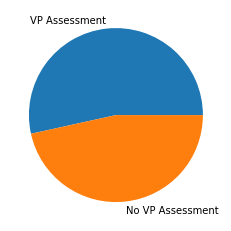

In [31]:
# What percentage of cities have climate impact assessments that identify vulnerable populations?

vp_assessments = equity_df.loc[equity_df["Evaluation of Risk to VPs"] == 1, "Account Number"].count()
print(f"{round((vp_assessments/565)*100,1)} percent of cities have climate impact assessments that identify vulnerable populations.")

plt.pie(x = [vp_assessments, 565-vp_assessments], labels=["VP Assessment", "No VP Assessment"]);

### Which cities have the highest action scores?
* **Buenos Aires, Montecario, Leon**, etc. have the highest action scores.
* Compared to the distribution of awareness scores, there are relatively few cities that achieved high action scores.
* Some cities achieved high scores by reporting a small number of hazards and a large proportion of actions aimed at protecting vulnerable populations (ex. Suwon, Seoul).

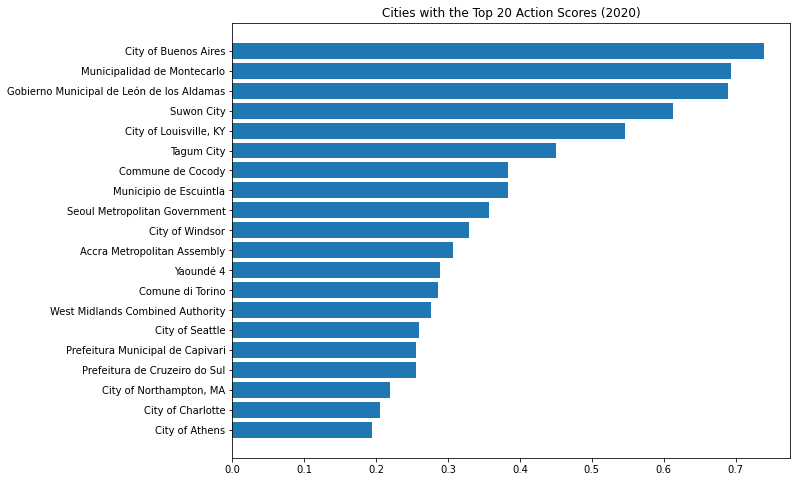

In [32]:
# Which cities have the highest action scores?

highest_action_scores = kpi_df.sort_values(by="Action Score", ascending=False).head(20)
highest_action_scores = highest_action_scores.sort_values(by="Action Score", ascending=True)

plt.figure(figsize=(10,8))
plt.barh(y = highest_action_scores["Organization"], width = highest_action_scores["Action Score"])
plt.title('Cities with the Top 20 Action Scores (2020)');

In [33]:
# Which cities have the highest action scores?

equity_df.iloc[:,np.r_[0:4,5,11:21]].sort_values(by="Action Score", ascending=False).head(10)

,Account Number,Organization,Country,CDP Region,Total Hazards,Actions Targeting VPs,VP Actions per Hazard,VP Actions per Hazard (Normalized),Actions Benefitting Poverty Reduction,PR Actions per Hazard,PR Actions per Hazard (Normalized),Actions Benefitting Social Inclusion,SI Actions per Hazard,SI Actions per Hazard (Normalized),Action Score
38,31155,City of Buenos Aires,Argentina,Latin America,7,10,1.4,1.000000,6,0.9,0.600000,7,1.0,0.357143,0.739286
543,841269,Municipalidad de Montecarlo,Argentina,Latin America,3,4,1.3,0.928571,1,0.3,0.200000,6,2.0,0.714286,0.692857
167,50359,Gobierno Municipal de León de los Aldamas,Mexico,Latin America,3,3,1.0,0.714286,4,1.3,0.866667,4,1.3,0.464286,0.689881
143,44185,Suwon City,Republic of Korea,East Asia,1,1,1.0,0.714286,1,1.0,0.666667,1,1.0,0.357143,0.613095
152,49333,"City of Louisville, KY",United States of America,North America,9,8,0.9,0.642857,5,0.6,0.400000,13,1.4,0.500000,0.546429
516,834374,Tagum City,Philippines,Southeast Asia and Oceania,5,0,0.0,0.000000,6,1.2,0.800000,14,2.8,1.000000,0.450000
437,73413,Commune de Cocody,Côte d'Ivoire,Africa,2,0,0.0,0.000000,3,1.5,1.000000,3,1.5,0.535714,0.383929
520,839666,Municipio de Escuintla,Guatemala,Latin America,2,0,0.0,0.000000,3,1.5,1.000000,3,1.5,0.535714,0.383929
58,31187,Seoul Metropolitan Government,Republic of Korea,East Asia,1,1,1.0,0.714286,0,0.0,0.000000,0,0.0,0.000000,0.357143
200,50578,City of Windsor,Canada,North America,9,7,0.8,0.571429,1,0.1,0.066667,3,0.3,0.107143,0.329167


### What is the geographic distribution of climate equity scores?

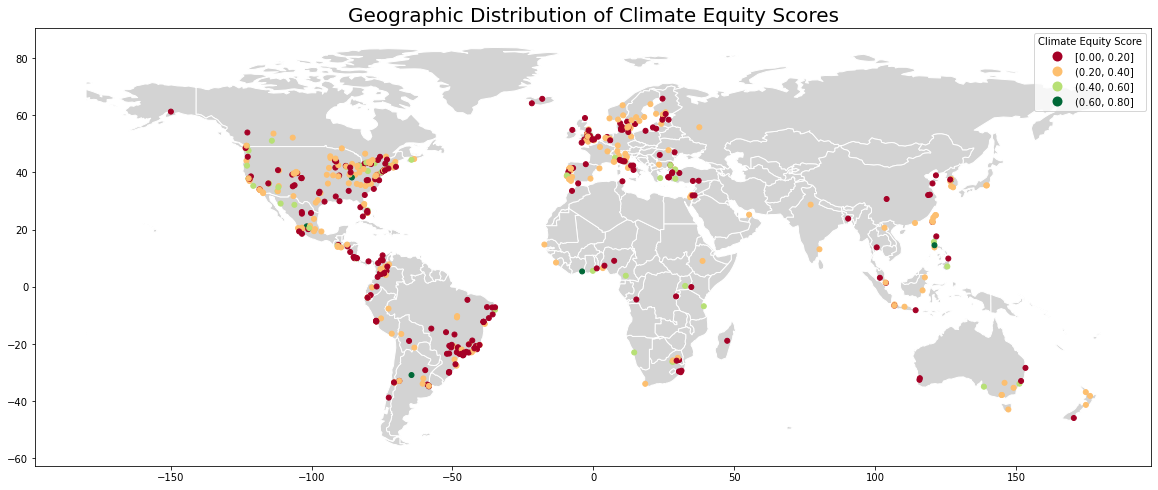

In [34]:
# Visualize the geographic distribution of climate equity scores

# Merge the geospatial coordinates into the cities dataframe
kpi_df = pd.merge(kpi_df, city_coords[["Account Number","lat", "long"]])

# Convert to a GeoDataFrame
kpi_gdf = gpd.GeoDataFrame(kpi_df, geometry=
                             gpd.points_from_xy(kpi_df['long'], kpi_df['lat']))

# Set the Coordinate Reference System
kpi_gdf.crs = "epsg:4326"

# Import a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove Antarctica from the map
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Plot the city climate equity score on the world map
fig, ax = plt.subplots(figsize=(20,30))
ax.set_aspect('equal')
world.plot(ax=ax, color='lightgrey', edgecolor='white')
kpi_gdf.plot(ax=ax,
             column='Overall Climate Equity Score',
             cmap='RdYlGn',
             scheme='user_defined',
             classification_kwds={'bins':[.2, .4, .6, .8]},
             marker='o', 
             markersize=25,
             legend=True,
             legend_kwds={"title":"Climate Equity Score"}
            )

plt.title(label="Geographic Distribution of Climate Equity Scores",
          fontdict={"fontsize":20}
         );

### Of the 88 cities on CDP's A-List, which cities are also ranked in the top 88 climate equity scores?
* Out of the 88 cities on CDP's A-List, **only 29 cities** also ranked in the top 88 climate equity scores.
* Only 3 of the cities in the top ten climate equity scores are on the CDP's A-List.

In [35]:
# Create a new dataframe for the CDP's 2020 A-List.

cities = ['Ajuntament de Barcelona', 'Auckland Council',
       'Ayuntamiento de Hermosillo', 'Ayuntamiento de Murcia',
       'Ayuntamiento de Vitoria-Gasteiz', 'BCP Council',
       'Bristol City Council', 'Bærum Kommune', 'Canberra',
       'City of Adelaide', 'City of Athens', 'City of Baltimore',
       'City of Berkeley', 'City of Berlin', 'City of Boston',
       'City of Boulder', 'City of Buenos Aires', 'City of Calgary',
       'City of Cape Town', 'City of Cleveland', 'City of Columbus',
       'City of Copenhagen', 'City of Denver', 'City of Espoo',
       'City of Eugene', 'City of Flagstaff', 'City of Hayward',
       'City of Helsinki', 'City of Lahti', 'City of Los Angeles',
       'City of Louisville, KY', 'City of Lund', 'City of Melbourne',
       'City of Miami', 'City of Paris', 'City of Park City, UT',
       'City of Philadelphia', 'City of Porto', 'City of San Antonio',
       'City of San Francisco', 'City of San José', 'City of Stockholm',
       'City of Sydney', 'City of Toronto', 'City of Turku',
       'City of Vancouver', 'City of West Palm Beach', 'City of Windsor',
       'City Örebro', 'Comune di Firenze', 'Comune di Torino',
       'Cuyahoga County', 'District of Columbia',
       'District of Saanich, BC', 'Egedal Municipality',
       'Gladsaxe Kommune', 'Gobierno Municipal de León de los Aldamas',
       'Government of Hong Kong Special Administrative Region',
       'Greater London Authority', 'Halifax Regional Municipality',
       'Helsingør Kommune / Elsinore Municipality',
       'Hoeje-Taastrup Kommune', 'Hørsholm Kommune',
       'Iskandar Regional Development Authority', 'Malmö Stad',
       'Mexico City', 'Moscow Government', 'Municipalidad de Peñalolén',
       'Municipalidad de San José', 'Municipality of Recife',
       'Município de Braga', 'Município de Águeda',
       'New Taipei City Government', 'Newcastle City Council',
       'Pingtung County Government', 'Prefeitura do Rio de Janeiro',
       'San Luis Obispo', 'Seoul Metropolitan Government',
       'Stadt Heidelberg', 'Stadt Zürich', 'Taichung City Government',
       'Tainan City Government', 'Taoyuan City Government',
       'The Local Government of Quezon City', 'Town of Breckenridge, CO',
       'Town of Vail, CO', 'Village of Park Forest, IL', 'Västervik']

regions = ['Europe', 'Southeast Asia and Oceania', 'Latin America', 'Europe',
       'Europe', 'Europe', 'Europe', 'Europe',
       'Southeast Asia and Oceania', 'Southeast Asia and Oceania',
       'Europe', 'North America', 'North America', 'Europe',
       'North America', 'North America', 'Latin America', 'North America',
       'Africa', 'North America', 'North America', 'Europe',
       'North America', 'Europe', 'North America', 'North America',
       'North America', 'Europe', 'Europe', 'North America',
       'North America', 'Europe', 'Southeast Asia and Oceania',
       'North America', 'Europe', 'North America', 'North America',
       'Europe', 'North America', 'North America', 'North America',
       'Europe', 'Southeast Asia and Oceania', 'North America', 'Europe',
       'North America', 'North America', 'North America', 'Europe',
       'Europe', 'Europe', 'North America', 'North America',
       'North America', 'Europe', 'Europe', 'Latin America', 'East Asia',
       'Europe', 'North America', 'Europe', 'Europe', 'Europe',
       'Southeast Asia and Oceania', 'Europe', 'Latin America', 'Europe',
       'Latin America', 'Latin America', 'Latin America', 'Europe',
       'Europe', 'East Asia', 'Europe', 'East Asia', 'Latin America',
       'North America', 'East Asia', 'Europe', 'Europe', 'East Asia',
       'East Asia', 'East Asia', 'Southeast Asia and Oceania',
       'North America', 'North America', 'North America', 'Europe']

a_list = {'Organization': cities, 'CDP Region': regions}
a_list = pd.DataFrame(a_list)

# Add a column to indicate A-List status
a_list["CDP A-List"] = 1

# Merge the a-list data into the kpi dataframe
kpi_df = pd.merge(kpi_df, a_list, how="left", on=["Organization", "CDP Region"])

# Clean up the missing values and datatype
kpi_df["CDP A-List"] = kpi_df["CDP A-List"].fillna(value=0)
kpi_df["CDP A-List"] = kpi_df["CDP A-List"].astype(int)

# Which cities on the A-List are also ranked in the top 88?

overlap = kpi_df.loc[(kpi_df["CDP A-List"] == 1) &
                     (kpi_df["Overall Climate Equity Rank"] <= 88)
                    ].sort_values("Overall Climate Equity Rank", ascending=True)

print("How many cities?", overlap.shape[0])
print("Which cities?",  overlap["Organization"].values.tolist())
overlap.head(10)

How many cities? 29
Which cities? ['City of Buenos Aires', 'Gobierno Municipal de León de los Aldamas', 'City of Louisville, KY', 'Ayuntamiento de Hermosillo', 'Comune di Torino', 'City of Sydney', 'Seoul Metropolitan Government', 'City of Windsor', 'The Local Government of Quezon City', 'City of Calgary', 'Municipality of Recife', 'Bristol City Council', 'City of Boston', 'City of San Francisco', 'City of Berkeley', 'Village of Park Forest, IL', 'City of Athens', 'Municipalidad de San José', 'San Luis Obispo', 'City of West Palm Beach', 'City of Adelaide', 'BCP Council', 'Moscow Government', 'Greater London Authority', 'City of Toronto', 'City of San José', 'Newcastle City Council', 'Stadt Zürich', 'District of Columbia']


,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank,lat,long,geometry,CDP A-List
38,31155,City of Buenos Aires,Argentina,Latin America,7,1,0.415094,0.707547,1.000000,0.600000,0.357143,0.739286,0.723416,1,-34.6037,-58.3816,POINT (-58.38160 -34.60370),1
167,50359,Gobierno Municipal de León de los Aldamas,Mexico,Latin America,3,1,0.443396,0.721698,0.714286,0.866667,0.464286,0.689881,0.705790,3,21.1221,-101.6840,POINT (-101.68400 21.12210),1
152,49333,"City of Louisville, KY",United States of America,North America,9,1,0.462264,0.731132,0.642857,0.400000,0.500000,0.546429,0.638780,7,38.1960,-85.6784,POINT (-85.67840 38.19600),1
168,50361,Ayuntamiento de Hermosillo,Mexico,Latin America,9,1,0.849057,0.924528,0.000000,0.200000,0.214286,0.103571,0.514050,13,29.0892,-110.9610,POINT (-110.96100 29.08920),1
89,35886,Comune di Torino,Italy,Europe,3,1,0.405660,0.702830,0.214286,0.466667,0.250000,0.286310,0.494570,16,45.1006,7.6680,POINT (7.66800 45.10060),1
30,31114,City of Sydney,Australia,Southeast Asia and Oceania,13,1,0.849057,0.924528,0.000000,0.000000,0.142857,0.035714,0.480121,19,-33.8675,151.2070,POINT (151.20700 -33.86750),1
58,31187,Seoul Metropolitan Government,Republic of Korea,East Asia,1,1,0.188679,0.594340,0.714286,0.000000,0.000000,0.357143,0.475741,21,37.5665,126.9780,POINT (126.97800 37.56650),1
200,50578,City of Windsor,Canada,North America,9,1,0.216981,0.608491,0.571429,0.066667,0.107143,0.329167,0.468829,22,42.3149,-83.0364,POINT (-83.03640 42.31490),1
254,54348,The Local Government of Quezon City,Philippines,Southeast Asia and Oceania,4,1,0.547170,0.773585,0.000000,0.333333,0.285714,0.154762,0.464173,23,15.6835,120.8620,POINT (120.86200 15.68350),1
65,35475,City of Calgary,Canada,North America,14,1,0.726415,0.863208,0.071429,0.000000,0.035714,0.044643,0.453925,25,51.0486,-114.0710,POINT (-114.07100 51.04860),1


### Of the cities with the top 88 climate equity scores, which cities are NOT on CDP's A-List?
* There are **59 cities** (including 7 in the top 10), such as Tagum, Montecario, Suwon, etc.
* These cities' significant efforts to incorporate social equity into their climate adaptation may have been overlooked by the CDP's ranking system.

In [36]:
# Which cities ranked in the top 88 are NOT on the A-List?

ranked_not_alist = kpi_df.loc[(kpi_df["Overall Climate Equity Rank"] <= 88) &
                              (kpi_df["CDP A-List"] == 0)
                             ].sort_values("Overall Climate Equity Rank", ascending=True)

print("How many cities?", ranked_not_alist.shape[0])
print("Which cities?",  ranked_not_alist["Organization"].values.tolist())
ranked_not_alist.head(10)

How many cities? 59
Which cities? ['Tagum City', 'Municipalidad de Montecarlo', 'Suwon City', 'Commune de Cocody', 'Yaoundé 4', 'Municipio de Escuintla', 'Accra Metropolitan Assembly', 'Nottingham City Council', 'Metropolitan Municipality of Lima', 'City of Seattle', 'City of Dar es Salaam', 'City of Salem, MA', 'Ayuntamiento de Chihuahua', 'City of Alameda', 'Walvis Bay Municipality', 'Alajuela', 'City Government of Davao', 'Prefeitura de São Paulo', 'City of Henderson', 'City of Medford', 'Kampala City', 'New York City', 'City of Phoenix', 'Abington Township', 'City of Chicago', 'Town of Bridgewater, NS', 'City of Johannesburg', 'City of Pittsburgh', 'City of Kitchener', 'City of Northampton, MA', 'City of Denizli', 'Município de Mafra', 'City of Rochester', 'Kadıköy', 'Ayuntamiento de Celaya', 'City of Surrey', 'Ekurhuleni Metropolitan Municipality', 'Municipality of Coronel Dominguez', 'Dobong-gu Municipal Government', 'Sofia Municipality', 'La Paz', 'Orange County, NC', 'City of O

,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank,lat,long,geometry,CDP A-List
516,834374,Tagum City,Philippines,Southeast Asia and Oceania,5,1,0.924528,0.962264,0.000000,0.800000,1.000000,0.450000,0.706132,2,14.51670,121.05000,POINT (121.05000 14.51670),0
543,841269,Municipalidad de Montecarlo,Argentina,Latin America,3,1,0.405660,0.702830,0.928571,0.200000,0.714286,0.692857,0.697844,4,-30.85000,-64.51670,POINT (-64.51670 -30.85000),0
143,44185,Suwon City,Republic of Korea,East Asia,1,1,0.471698,0.735849,0.714286,0.666667,0.357143,0.613095,0.674472,5,37.17000,126.80500,POINT (126.80500 37.17000),0
437,73413,Commune de Cocody,Côte d'Ivoire,Africa,2,1,0.849057,0.924528,0.000000,1.000000,0.535714,0.383929,0.654228,6,5.36020,-3.96740,POINT (-3.96740 5.36020),0
498,831618,Yaoundé 4,Cameroon,Africa,5,1,0.792453,0.896226,0.000000,0.800000,0.357143,0.289286,0.592756,8,3.86670,11.51670,POINT (11.51670 3.86670),0
520,839666,Municipio de Escuintla,Guatemala,Latin America,2,1,0.518868,0.759434,0.000000,1.000000,0.535714,0.383929,0.571681,9,14.30500,-90.78500,POINT (-90.78500 14.30500),0
100,36039,Accra Metropolitan Assembly,Ghana,Africa,2,1,0.518868,0.759434,0.357143,0.333333,0.178571,0.306548,0.532991,10,5.56543,-0.16819,POINT (-0.16819 5.56543),0
14,13506,Nottingham City Council,United Kingdom of Great Britain and Northern I...,Europe,5,1,1.000000,1.000000,0.000000,0.000000,0.142857,0.035714,0.517857,11,52.95000,-1.15000,POINT (-1.15000 52.95000),0
46,31170,Metropolitan Municipality of Lima,Peru,Latin America,4,1,0.830189,0.915094,0.142857,0.000000,0.178571,0.116071,0.515583,12,-12.04330,-77.02830,POINT (-77.02830 -12.04330),0
16,16581,City of Seattle,United States of America,North America,3,1,0.500000,0.750000,0.214286,0.000000,0.607143,0.258929,0.504464,14,47.60620,-122.33200,POINT (-122.33200 47.60620),0


### Of the 88 cities on CDP's A-List, which cities are NOT ranked in the top 88 climate equity scores?
* There are **59 cities** (including some with very low climate equity scores) that are on the CDP's A-List but did not rank in the top 88 climate equity scores.
* This suggests that some of the cities that CDP included on its A-List are actually among the worst at incorporating social equity into their climate adaptation efforts.

In [37]:
# Which cities on the A-List were not ranked in the top 88?

alist_not_ranked = kpi_df.loc[(kpi_df["Overall Climate Equity Rank"] > 88) &
                              (kpi_df["CDP A-List"] == 1)
                             ].sort_values("Overall Climate Equity Rank", ascending=False)

print("How many cities?", alist_not_ranked.shape[0])
print("Which cities?",  alist_not_ranked["Organization"].values.tolist())
alist_not_ranked.head(10)

How many cities? 59
Which cities? ['District of Saanich, BC', 'City of Philadelphia', 'Ayuntamiento de Vitoria-Gasteiz', 'City of Hayward', 'Iskandar Regional Development Authority', 'City of Copenhagen', 'Stadt Heidelberg', 'City of Los Angeles', 'Hørsholm Kommune', 'Hoeje-Taastrup Kommune', 'City of Porto', 'City of Stockholm', 'Comune di Firenze', 'Helsingør Kommune / Elsinore Municipality', 'Gladsaxe Kommune', 'Västervik', 'City Örebro', 'Town of Breckenridge, CO', 'Taoyuan City Government', 'City of Lahti', 'City of Turku', 'Ajuntament de Barcelona', 'City of Lund', 'City of Cape Town', 'New Taipei City Government', 'Malmö Stad', 'Government of Hong Kong Special Administrative Region', 'Ayuntamiento de Murcia', 'City of Helsinki', 'Bærum Kommune', 'Município de Braga', 'City of Melbourne', 'City of Espoo', 'Municipalidad de Peñalolén', 'Egedal Municipality', 'City of Boulder', 'Mexico City', 'Cuyahoga County', 'City of Paris', 'City of Flagstaff', 'City of Miami', 'Town of Vail, C

,Account Number,Organization,Country,CDP Region,Total Hazards,Evaluation of Risk to VPs,Affected VPs per Hazard (Normalized),Awareness Score,VP Actions per Hazard (Normalized),PR Actions per Hazard (Normalized),SI Actions per Hazard (Normalized),Action Score,Overall Climate Equity Score,Overall Climate Equity Rank,lat,long,geometry,CDP A-List
345,59572,"District of Saanich, BC",Canada,North America,11,0,0.094340,0.047170,0.000000,0.0,0.000000,0.000000,0.023585,461,48.514200,-123.383900,POINT (-123.38390 48.51420),1
54,31181,City of Philadelphia,United States of America,North America,4,0,0.169811,0.084906,0.000000,0.0,0.071429,0.017857,0.051381,425,39.952300,-75.163800,POINT (-75.16380 39.95230),1
147,46470,Ayuntamiento de Vitoria-Gasteiz,Spain,Europe,3,0,0.216981,0.108491,0.000000,0.0,0.000000,0.000000,0.054245,414,42.840000,-2.670000,POINT (-2.67000 42.84000),1
227,54078,City of Hayward,United States of America,North America,5,0,0.264151,0.132075,0.000000,0.0,0.000000,0.000000,0.066038,395,37.668900,-122.081000,POINT (-122.08100 37.66890),1
258,54388,Iskandar Regional Development Authority,Malaysia,Southeast Asia and Oceania,3,0,0.566038,0.283019,0.214286,0.0,0.250000,0.169643,0.226331,309,1.482793,103.718422,POINT (103.71842 1.48279),1
20,31009,City of Copenhagen,Denmark,Europe,4,1,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.250000,296,55.676100,12.568300,POINT (12.56830 55.67610),1
42,31165,Stadt Heidelberg,Germany,Europe,3,1,0.028302,0.514151,0.000000,0.0,0.000000,0.000000,0.257075,291,49.398800,8.672430,POINT (8.67243 49.39880),1
11,10894,City of Los Angeles,United States of America,North America,6,1,0.047170,0.523585,0.000000,0.0,0.000000,0.000000,0.261792,287,34.052200,-118.244000,POINT (-118.24400 34.05220),1
329,58797,Hørsholm Kommune,Denmark,Europe,4,1,0.000000,0.500000,0.000000,0.0,0.178571,0.044643,0.272321,286,55.883500,12.504900,POINT (12.50490 55.88350),1
316,58489,Hoeje-Taastrup Kommune,Denmark,Europe,1,1,0.094340,0.547170,0.000000,0.0,0.000000,0.000000,0.273585,268,55.656300,12.289800,POINT (12.28980 55.65630),1


## Summary

* The main story here is that CDP’s A-List does not adequately reflect climate equity. My score points both to cities like Tagum that are among the best in terms of equity but don’t appear on the A-List, and to cities like Philadelphia that are on the A-List but are among the worst in terms of equity.
* Another takeaway is that cities are doing better at awareness than at action. It is the action score that really separates out the top cities. Many cities are doing better with their awareness of the impact on vulnerable populations, but relatively few are taking actions to actually mitigate that impact.

# 6. Conclusion

This notebook has taken up the challenge of using CDP’s data to develop key performance indicators (KPIs) that can help cities adapt to climate change in ways that are socially equitable. First, I analyzed the data reported by cities about the climate hazards they face, and selected KPIs for measuring their awareness of how these hazards are affecting the most vulnerable populations within their communities. Second, I analyzed the data reported by cities about the actions they are taking to mitigate climate hazards, and selected KPIs for measuring the extent to which these actions prioritize the protection of vulnerable populations. Finally, I combined these KPIs into an overall climate equity score for each city and compared the results to those of CDPs own scoring system.

My analysis shows that most cities in the CDP data have not thoroughly incorporated social equity and inclusion into their responses to climate change, though some progress is being made. 

Most of the progress has been in the growing awareness by city governments of the disproportionate impact that climate hazards have on their most vulnerable residents. More than half (53.5%) of the cities in the CDP data report having carried out a climate impact assessment that identifies vulnerable populations. This incorporation of social equity into the assessment process is helping to bring into sharper focus a picture of how climate hazards are affecting vulnerable populations. For example, cities provided data showing which types of climate hazards are most likely to affect which types of vulnerable populations. 

However, the growing awareness among city governments of how climate hazards are disproportionately affecting their most vulnerable residents has not yet translated into a corresponding increase in mitigation efforts that prioritize the protection of those residents. Although cities acknowledge that 55% of the climate hazards they face are increasing the risks to already vulnerable populations, they report that only 4% of their responses to those same hazards include actions aimed at protecting the most vulnerable.

Nevertheless, my analysis of the CDP data draws attention to certain cities that are leading the way toward greater urban climate equity. Cities like Buenos Aires in South America, Tagum City in Asia, and Louisville in North America (some of which do not appear on CDP’s A-List) have significantly incorporated social equity and inclusion into both their assessments of local climate impacts and their efforts to mitigate those impacts. The data reported by such leading cities in climate equity point to best practices that could be adopted by their peers. For example, cities that report taking actions to protect vulnerable populations also provide evidence that these efforts can help to reduce poverty and improve social inclusion in urban communities.

The analysis in this notebook hardly exhausts the many insights to be gained from CDP’s extremely rich collection of data. First of all, I have mainly focused on the more readily quantifiable answers that cities provided on the CDP questionnaire, but they also provided substantial textual descriptions of both climate hazards and actions that could be profitably mined with natural language processing. Perhaps the most obvious next step is to incorporate the data collected by CDP in years prior to 2020, which would facilitate examining the trends in urban climate equity over time. The analysis would also surely benefit from incorporating the data from CDP’s questionnaires for corporations, which cities often partner with in tackling climate issues. However, any analysis focused primarily on the CDP data will continue to suffer from its geographical limitations until more cities in Asia, Africa, and the Middle East start to participate in the global disclosure system.